# STL monitoring over interval functions

In [20]:
from functools import partial, reduce

## Interval newton

In [21]:
load('interval_utils.py')

### Interval operations

In [22]:
interval([1,2,5]).str(style='brackets')


'[1.0000000000000000 .. 5.0000000000000000]'

In [23]:
RIF(-1,2).intersection(RIF(1,3)).str(style='brackets')

'[1.0000000000000000 .. 2.0000000000000000]'

In [24]:
isub(RIF(0,2), RIF(-1,1)).str(style='brackets')

'[1.0000000000000000 .. 2.0000000000000000]'

In [25]:
isub(RIF(0,2), RIF(0.5,1.5)).str(style='brackets')

'[0.00000000000000000 .. 2.0000000000000000]'

In [26]:
isub(RIF(0,2), RIF(1,2)).str(style='brackets')

'[0.00000000000000000 .. 1.0000000000000000]'

In [27]:
extdiv(RIF(3,4), RIF(1,2), RIF(1,5)).str(style='brackets')

b = 2.?


'[1.5000000000000000 .. 4.0000000000000000]'

In [28]:
extdiv(RIF(3,4), RIF(0,2), RIF(1,5)).str(style='brackets')

b = 1.?


'[1.0000000000000000 .. 1.5000000000000000]'

In [29]:
RIF(1,2).center()

1.50000000000000

In [30]:
def newton(f, fprime, x0, n):
    x = RIF(x0)
    for i in range(n):
        xc = RIF(x.center())
#         x = (xc - f(xc)/fprime(x)).intersection(x)
        x = xc + extdiv(-f(xc), fprime(x), x - xc)
        print "f({}) = {}".format(i, x.str(style='brackets')
                                  if x.diameter() > 0.1 else x)
    return x

### Example: finding $\sqrt{2}$

In [31]:
f      = lambda x: x**2 - 2
fprime = lambda x: 2*x

In [32]:
sqrt(2.0)

1.41421356237310

In [33]:
newton(f, fprime, RIF(1.4,1.45), 15)

b = 2.8?
f(0) = 1.415?
b = 2.829?
f(1) = 1.41421356?
b = 2.8284272?
f(2) = 1.414213562373095?
b = 2.828427124746190?
f(3) = 1.414213562373095?
b = 2.828427124746190?
f(4) = 1.414213562373095?
b = 2.828427124746190?
f(5) = 1.414213562373095?
b = 2.828427124746190?
f(6) = 1.414213562373095?
b = 2.828427124746190?
f(7) = 1.414213562373095?
b = 2.828427124746190?
f(8) = 1.414213562373095?
b = 2.828427124746190?
f(9) = 1.414213562373095?
b = 2.828427124746190?
f(10) = 1.414213562373095?
b = 2.828427124746190?
f(11) = 1.414213562373095?
b = 2.828427124746190?
f(12) = 1.414213562373095?
b = 2.828427124746190?
f(13) = 1.414213562373095?
b = 2.828427124746190?
f(14) = 1.414213562373095?


1.414213562373095?

### Example: enclosing 0 crossings

In [34]:
def lower(f, I, x):
    return float(RIF(f(x + I)).endpoints()[0])
def upper(f, I, x):
    return float(RIF(f(x + I)).endpoints()[1])

In [35]:
I = RIF(-0.3,0.3)

In [36]:
g = lambda x: sin(x+I)
gprime = lambda x: cos(x+I)

In [37]:
x0 = newton(g, gprime, RIF(-pi/4,pi/4),15)

b = 1.?
f(0) = [-0.63340159272047103 .. 0.63340159272047103]
b = 1.?
f(1) = [-0.49658603143445352 .. 0.49658603143445352]
b = 1.?
f(2) = [-0.42268397111483092 .. 0.42268397111483092]
b = 1.?
f(3) = [-0.39400947238022361 .. 0.39400947238022361]
b = 1.?
f(4) = [-0.38444771270454759 .. 0.38444771270454759]
b = 1.?
f(5) = [-0.38143040832528236 .. 0.38143040832528236]
b = 1.?
f(6) = [-0.38049526589605954 .. 0.38049526589605954]
b = 1.?
f(7) = [-0.38020707230770845 .. 0.38020707230770845]
b = 1.?
f(8) = [-0.38011841133911179 .. 0.38011841133911179]
b = 1.?
f(9) = [-0.38009115000821859 .. 0.38009115000821859]
b = 1.?
f(10) = [-0.38008276912492040 .. 0.38008276912492040]
b = 1.?
f(11) = [-0.38008019274181105 .. 0.38008019274181105]
b = 1.?
f(12) = [-0.38007940074341390 .. 0.38007940074341390]
b = 1.?
f(13) = [-0.38007915727867303 .. 0.38007915727867303]
b = 1.?
f(14) = [-0.38007908243635936 .. 0.38007908243635936]


In [38]:
x1 = newton(g, gprime, RIF(3*pi/4,5*pi/4),15)

b = -1.?
f(0) = [2.5081910608693198 .. 3.7749942463102660]
b = -1.?
f(1) = [2.6450066221553374 .. 3.6381786850242493]
b = -1.?
f(2) = [2.7189086824749604 .. 3.5642766247046259]
b = -1.?
f(3) = [2.7475831812095683 .. 3.5356021259700184]
b = -1.?
f(4) = [2.7571449408852446 .. 3.5260403662943421]
b = -1.?
f(5) = [2.7601622452645098 .. 3.5230230619150765]
b = -1.?
f(6) = [2.7610973876937330 .. 3.5220879194858537]
b = -1.?
f(7) = [2.7613855812820840 .. 3.5217997258975027]
b = -1.?
f(8) = [2.7614742422506806 .. 3.5217110649289061]
b = -1.?
f(9) = [2.7615015035815737 .. 3.5216838035980130]
b = -1.?
f(10) = [2.7615098844648717 .. 3.5216754227147145]
b = -1.?
f(11) = [2.7615124608479812 .. 3.5216728463316054]
b = -1.?
f(12) = [2.7615132528463783 .. 3.5216720543332083]
b = -1.?
f(13) = [2.7615134963111191 .. 3.5216718108684671]
b = -1.?
f(14) = [2.7615135711534328 .. 3.5216717360261534]


In [39]:
x2 = newton(g, gprime, RIF(7*pi/4,9*pi/4),15)

b = 1.?
f(0) = [5.6497837144591107 .. 6.9165868999000609]
b = 1.?
f(1) = [5.7865992757451278 .. 6.7797713386140455]
b = 1.?
f(2) = [5.8605013360647513 .. 6.7058692782944212]
b = 1.?
f(3) = [5.8891758347993601 .. 6.6771947795598133]
b = 1.?
f(4) = [5.8987375944750359 .. 6.6676330198841365]
b = 1.?
f(5) = [5.9017548988543016 .. 6.6646157155048709]
b = 1.?
f(6) = [5.9026900412835248 .. 6.6636805730756486]
b = 1.?
f(7) = [5.9029782348718757 .. 6.6633923794872976]
b = 1.?
f(8) = [5.9030668958404728 .. 6.6633037185187006]
b = 1.?
f(9) = [5.9030941571713659 .. 6.6632764571878074]
b = 1.?
f(10) = [5.9031025380546635 .. 6.6632680763045090]
b = 1.?
f(11) = [5.9031051144377730 .. 6.6632654999213994]
b = 1.?
f(12) = [5.9031059064361706 .. 6.6632647079230028]
b = 1.?
f(13) = [5.9031061499009114 .. 6.6632644644582620]
b = 1.?
f(14) = [5.9031062247432251 .. 6.6632643896159483]


In [40]:
x3 = newton(g, gprime, RIF(11*pi/4,13*pi/4),15)

b = -1.?
f(0) = [8.7913763680489029 .. 10.058179553489858]
b = -1.?
f(1) = [8.9281919293349201 .. 9.9213639922038404]
b = -1.?
f(2) = 10.?
b = -1.?
f(3) = 10.?
b = -1.?
f(4) = 10.?
b = -1.?
f(5) = 10.?
b = -1.?
f(6) = 10.?
b = -1.?
f(7) = 10.?
b = -1.?
f(8) = 10.?
b = -1.?
f(9) = 10.?
b = -1.?
f(10) = 10.?
b = -1.?
f(11) = 10.?
b = -1.?
f(12) = 10.?
b = -1.?
f(13) = 10.?
b = -1.?
f(14) = 10.?


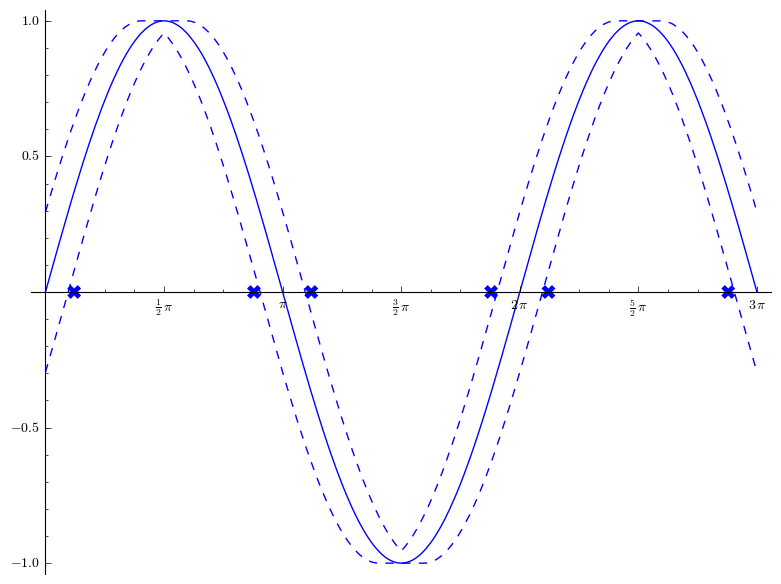

In [41]:
p = plot([partial(lower, sin, I), sin, partial(upper, sin, I)], 
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
         linestyle=['--', '-', '--', '--', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)
p += point((x0.endpoints()[1], 0), marker='X', size=100)
p += point((x1.endpoints()[0], 0), marker='X', size=100)
p += point((x1.endpoints()[1], 0), marker='X', size=100)
p += point((x2.endpoints()[0], 0), marker='X', size=100)
p += point((x2.endpoints()[1], 0), marker='X', size=100)
p += point((x3.endpoints()[0], 0), marker='X', size=100)
p

## Example: time shifted sin function

In [42]:
def shift_plot(t0, I=RIF(-0.3,0.3)):
    t0 = RIF(t0)
    I = RIF(-0.3,0.3)
    def shift_sin_c(t):
        return sin((t + t0).center())
        
    shift_sin = lambda t: sin(t + t0)
    
    p = plot([partial(lower, shift_sin, I),
              (lambda t: sin(t + t0.lower())),
              (lambda t: sin(t + t0.upper())),
              partial(upper, shift_sin, I)], 
         xmin=0, xmax=3*pi,
         color=['grey', 'blue', 'orange', 'grey'],
         linestyle=['--', '-', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)
    return p

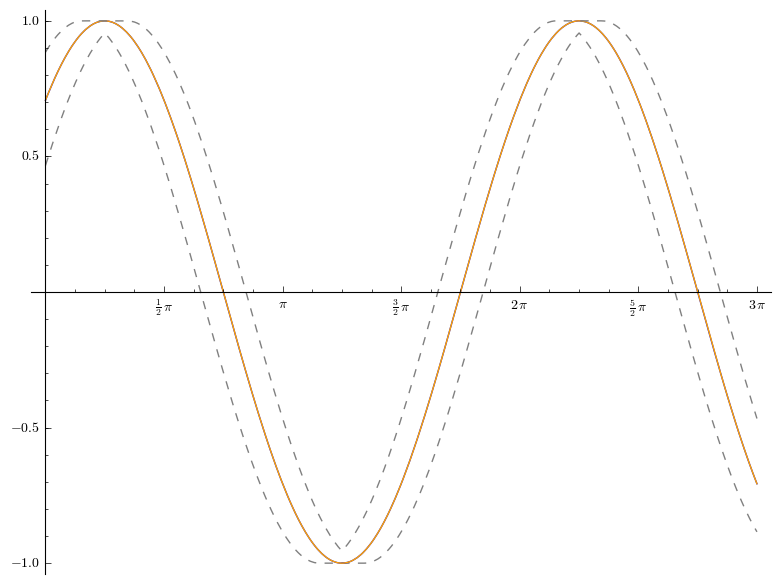

In [43]:
shift_plot(RIF(pi/4))

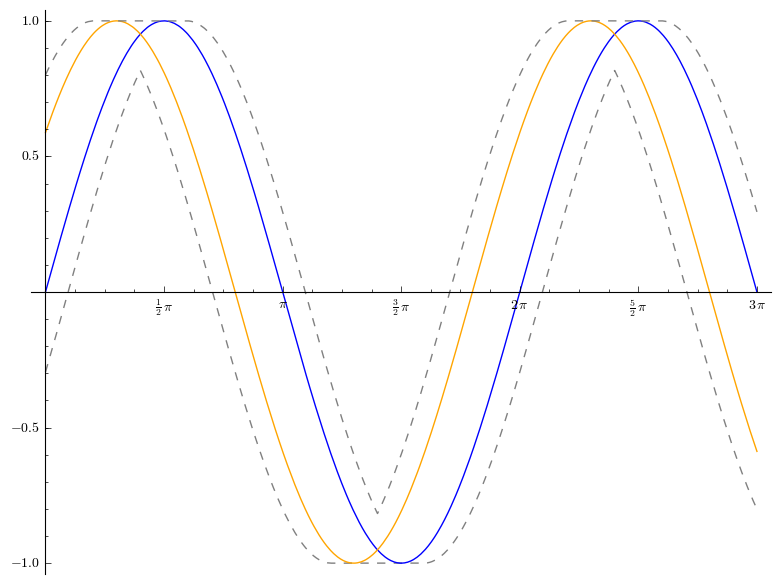

In [44]:
shift_plot(RIF(0,pi/5))

## Three-valued signals

In [45]:
load('interval_signals.py')

### Example: merging overlapping

In [46]:
Signal(RIF(0,pi), [(RIF(0,3*pi/4), True), (RIF(pi/4,pi), True)])

Signal([0.00000000000000000 .. 3.1415926535897936], [([0.00000000000000000 .. 3.1415926535897936], True)])

In [47]:
Signal(RIF(0,pi), [(RIF(0,pi/2), True), (RIF(pi/2), True)])

Signal([0.00000000000000000 .. 3.1415926535897936], [([0.00000000000000000 .. 1.5707963267948968], True)])

In [48]:
Signal(RIF(0,pi), [(RIF(0,3*pi/4), False), (RIF(pi/4,pi), False)])

Signal([0.00000000000000000 .. 3.1415926535897936], [([0.00000000000000000 .. 3.1415926535897936], False)])

In [49]:
try:
    Signal(RIF(0,pi), [(RIF(0,3*pi/4), True), (RIF(pi/4,pi), False)])
except Exception as e:
    print e

Inconsitient intervals 1.?e1 (True) and 1.?e1 (False) in signal!


### Example: sin signal

In [50]:
sig = Signal(RIF(0,3*pi),
             [(RIF(x0.endpoints()[1], x1.endpoints()[0]),True),
              (RIF(x1.endpoints()[1], x2.endpoints()[0]),False),
              (RIF(x2.endpoints()[1], x3.endpoints()[0]),True)])
sig

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.38007908243635935 .. 2.7615135711534329], True), ([3.5216717360261533 .. 5.9031062247432252], False), ([6.6632643896159482 .. 9.0446988783330174], True)])

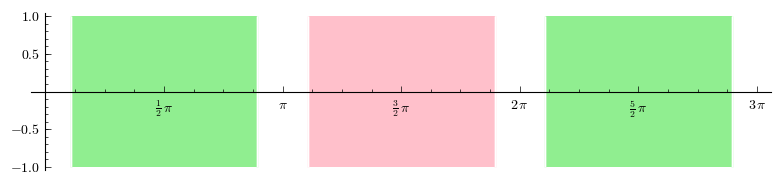

In [51]:
sig.plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Negation:

In [52]:
~sig

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.38007908243635935 .. 2.7615135711534329], False), ([3.5216717360261533 .. 5.9031062247432252], True), ([6.6632643896159482 .. 9.0446988783330174], False)])

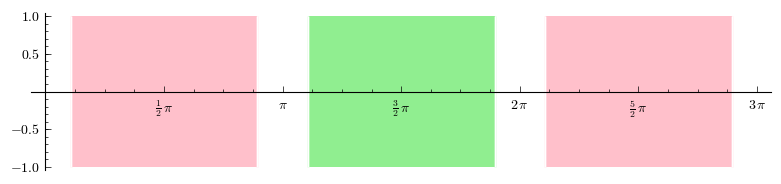

In [53]:
(~sig).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Backshifting:

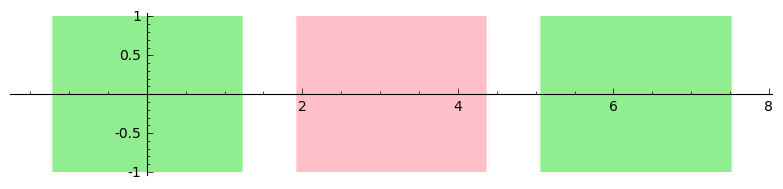

In [54]:
sig.F(pi/2).plot()

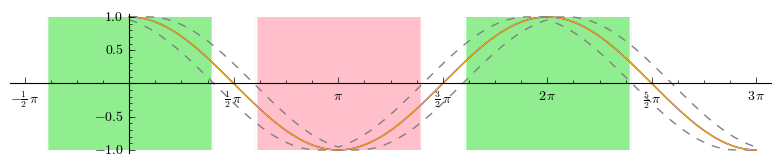

In [55]:
shift_plot(RIF(pi/2)) + sig.F(pi/2).plot(ticks=(pi/2,0.5), tick_formatter=pi)

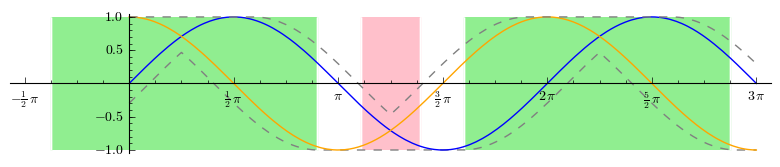

In [56]:
shift_plot(RIF(0,pi/2)) + sig.F(RIF(0,pi/2)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

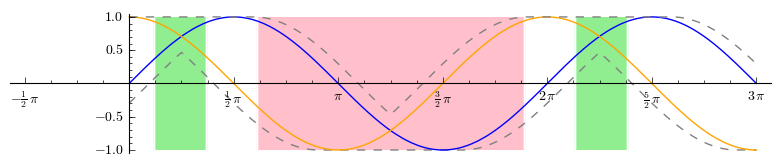

In [57]:
shift_plot(RIF(0,pi/2)) + sig.G(RIF(0,pi/2)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

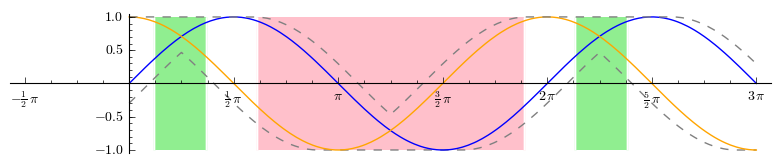

In [58]:
shift_plot(RIF(0,pi/2)) + (~(~sig).F(RIF(0,pi/2))).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Intersection:

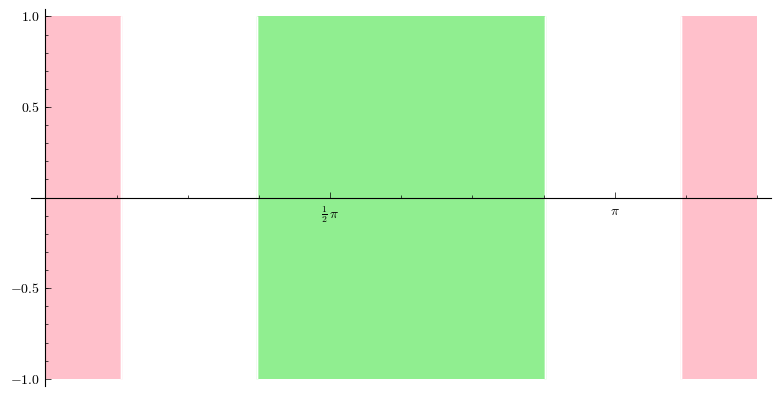

In [59]:
(sig & sig.F((7/4)*pi)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

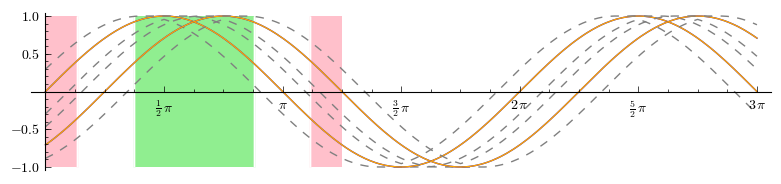

In [60]:
shift_plot(0) + shift_plot((7/4)*pi) + (sig & sig.F((7/4)*pi)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Union:

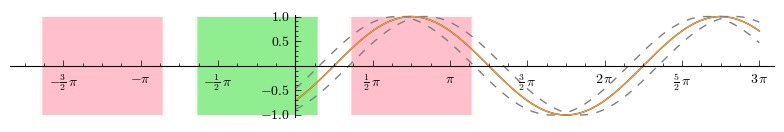

In [61]:
shift_plot((7/4)*pi) + (~sig.F((7/4)*pi)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Truth value:

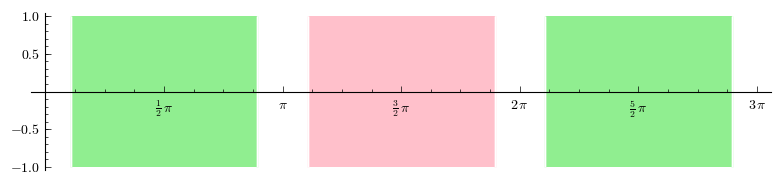

In [62]:
sig.plot(ticks=(pi/2,0.5), tick_formatter=pi)

In [63]:
bool(sig)

False

In [64]:
sig(pi/2)

True

In [65]:
sig(pi)

In [66]:
sig(3/2*pi)

False

#### Until

signal for $-\sin(x)$

In [67]:
sig2 = ~sig
sig2

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.38007908243635935 .. 2.7615135711534329], False), ([3.5216717360261533 .. 5.9031062247432252], True), ([6.6632643896159482 .. 9.0446988783330174], False)])

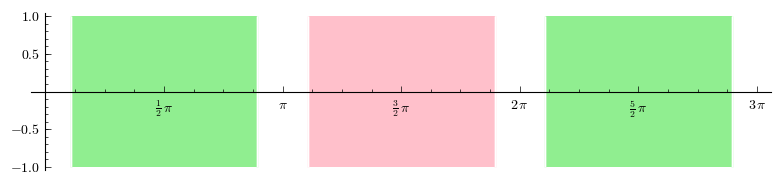

In [68]:
sig.plot(ticks=(pi/2,0.5), tick_formatter=pi)

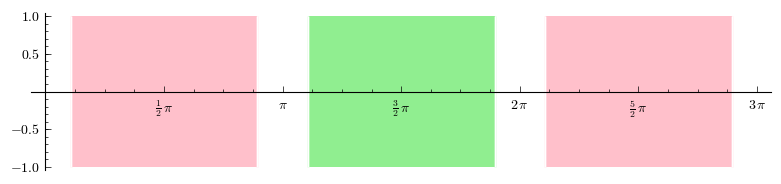

In [69]:
sig2.plot(ticks=(pi/2,0.5), tick_formatter=pi)

/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


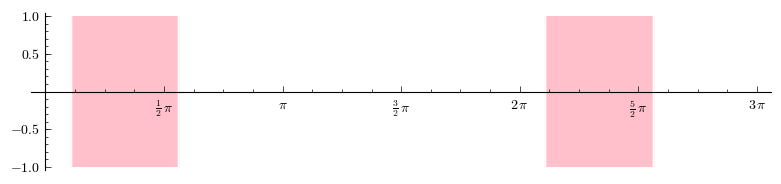

In [70]:
sig.U(RIF([0,pi/3]), sig2).plot(ticks=(pi/2,0.5), tick_formatter=pi)

Check $\mathrel{{\mathbf F}_{[a,b]}} \varphi \equiv \mathrm{true} \mathrel{{\mathbf U}_{[a,b]}} \varphi$: 

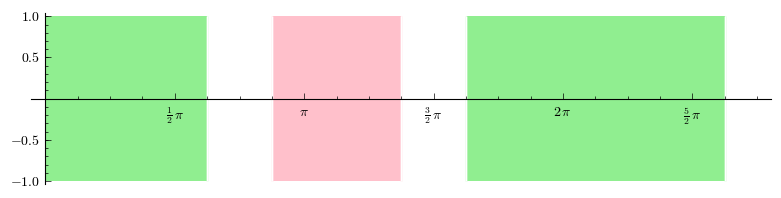

In [71]:
sig.F(RIF(pi/4,pi/2)).to_domain(RIF(0,11*pi/4)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

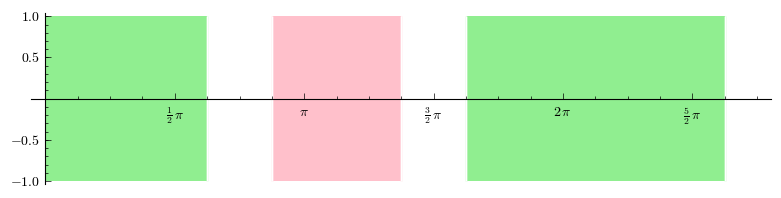

In [72]:
true_signal(RIF(0,3*pi)).U(RIF(pi/4,pi/2), sig).plot(ticks=(pi/2,0.5), tick_formatter=pi)

## Taylor models

In [73]:
load('taylor_models.py')

In [74]:
R.<x> = QQ[]

### Example: Sine Taylor model

In [75]:
sinTM = TM(x - (1/factorial(3))*x**3 + (1/factorial(5))*x**5 - (1/factorial(7))*x**7,
           (1/factorial(9))*sin(RIF(-pi,pi))*RIF(-pi,pi)**9)
str(sinTM)
#type(sinTM(1))
#sinTM(1).str(style='brackets')

'-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x + [-0.082145886611128358 .. 0.082145886611128358]'

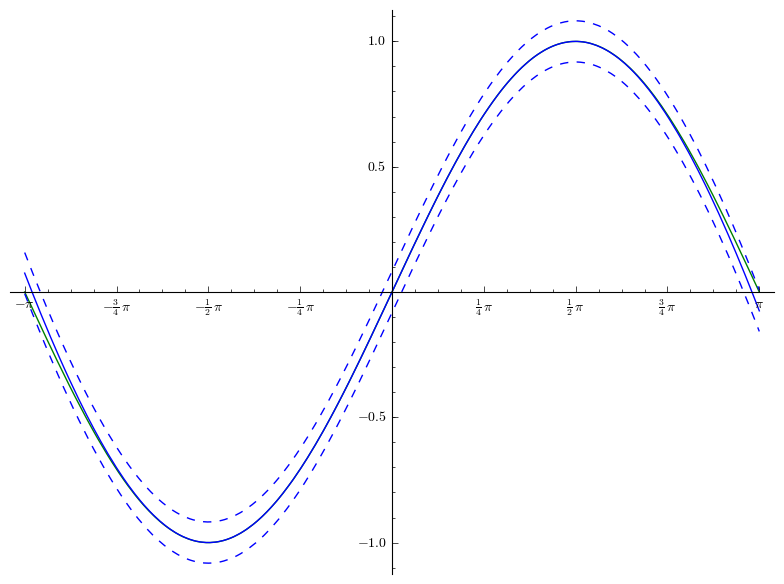

In [76]:
plot(sin, xmin=-pi, xmax=pi, color='green') + sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)

In [77]:
sinTM.f(x-RIF(0,pi/2))

-0.0001984126984126985?*x^7 + 0.01?*x^6 + 0.00?*x^5 + 0.0?*x^4 + 0.?*x^3 + 0.?*x^2 + 0.?e1*x - 1.?

#### Taylor model multiplication:

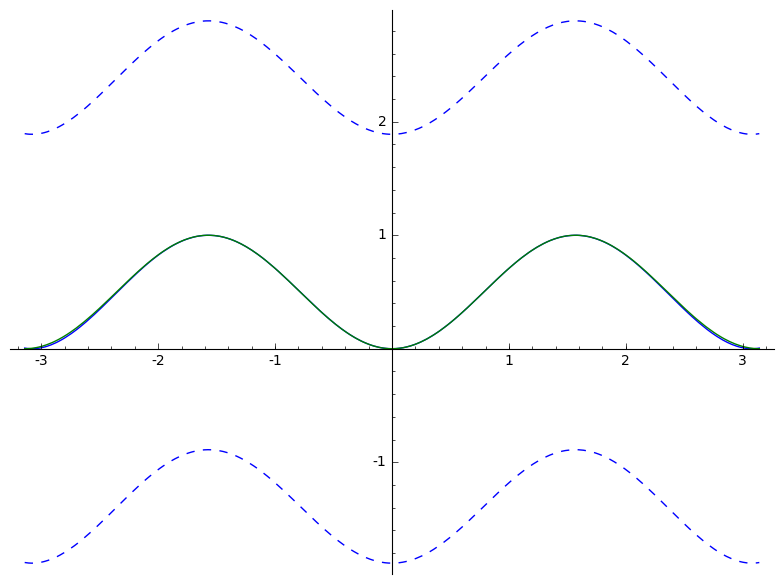

In [78]:
sinTM.mul(sinTM, RIF(-pi,pi), 15).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

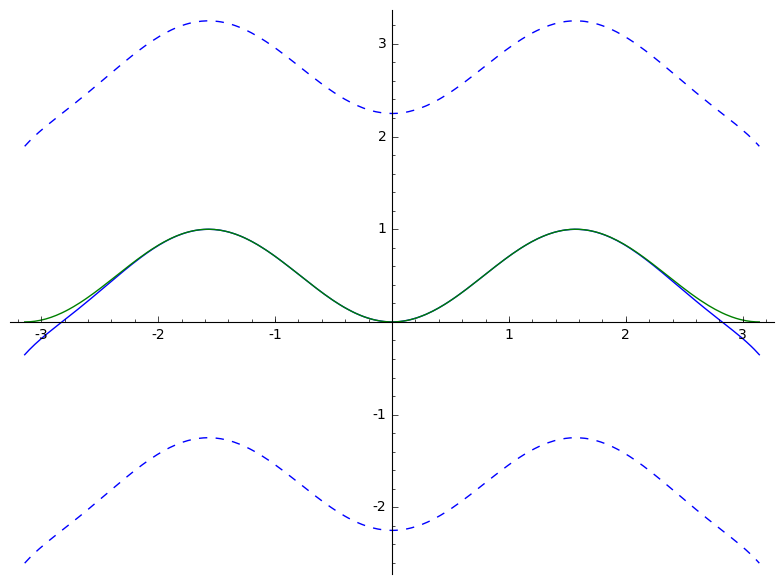

In [79]:
sinTM.mul(sinTM, RIF(-pi,pi), 13).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

#### Root detection:

In [80]:
a, b = newton(sinTM, sinTM.derivative(), RIF(-pi/4,pi/4), 10).endpoints()
a,b

b = 1.?
f(0) = [-0.13846788869053892 .. 0.13846788869053892]
b = 1.0?
f(1) = [-0.090443926172562750 .. 0.090443926172562750]
b = 1.0?
f(2) = [-0.089898630057776500 .. 0.089898630057776500]
b = 1.0?
f(3) = [-0.089893786260804979 .. 0.089893786260804979]
b = 1.0?
f(4) = [-0.089893743367904914 .. 0.089893743367904914]
b = 1.0?
f(5) = [-0.089893742988089276 .. 0.089893742988089276]
b = 1.0?
f(6) = [-0.089893742984726008 .. 0.089893742984726008]
b = 1.0?
f(7) = [-0.089893742984696227 .. 0.089893742984696227]
b = 1.0?
f(8) = [-0.089893742984695963 .. 0.089893742984695963]
b = 1.0?
f(9) = [-0.089893742984695963 .. 0.089893742984695963]


(-0.0898937429846960, 0.0898937429846960)

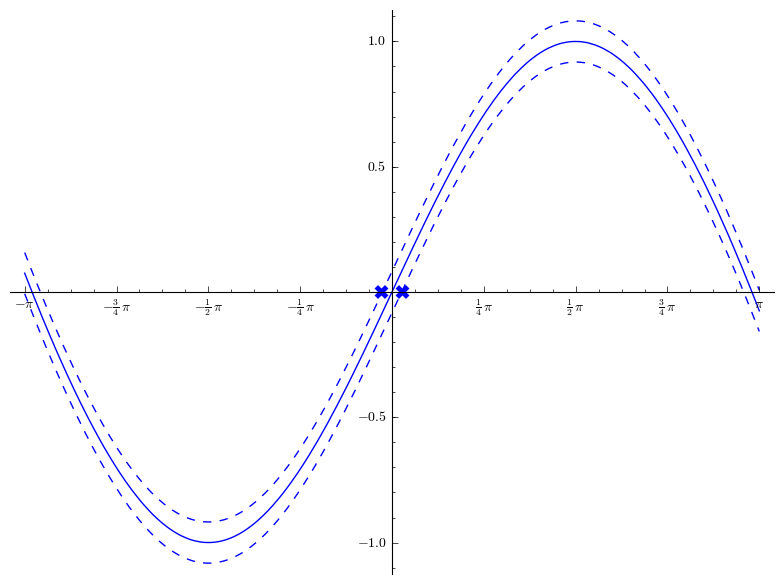

In [81]:
p = sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)
p += point((a, 0), marker='X', size=100)
p += point((b, 0), marker='X', size=100)
p

## Piecewise Taylor model

### Example: piecewise sine

In [82]:
seq = TMSeq([(RIF(0,1), sinTM), (RIF(1,2), sinTM.mul(TM(x, RIF(0)), RIF(1,2)))])
seq

TMSeq([(1.?, TM(-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x, 0.0?)), (2.?, TM(-1/5040*x^8 + 1/120*x^6 - 1/6*x^4 + x^2, 0.?))])

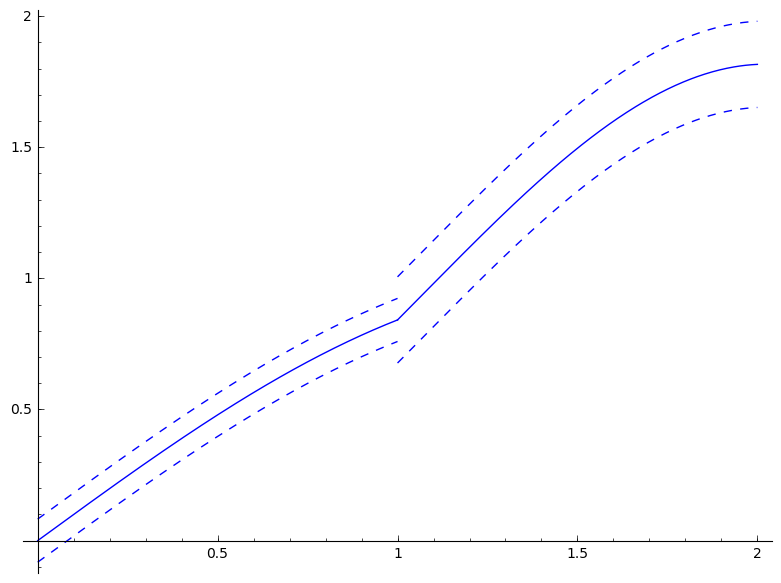

In [83]:
seq.plot()

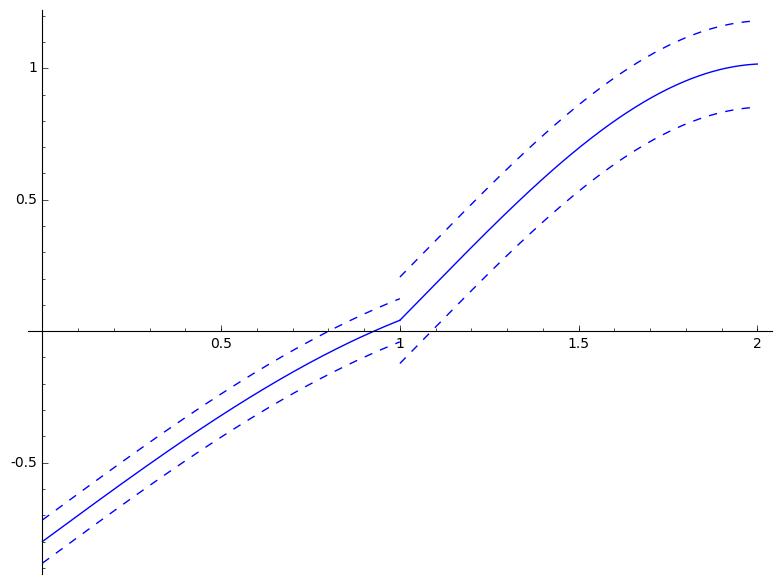

In [84]:
seq2 = seq.map(lambda x: x - 0.8)
plt = seq2.plot()
plt

#### Root detection:

In [85]:
a, b = newton(seq2, seq2.map(lambda x: x.derivative()), RIF(0.5,1.5), 10).endpoints()
a,b

b = 1.?e1
f(0) = [0.51916639450203383 .. 1.2870221024425228]
b = 1.?
f(1) = [0.74589867691294509 .. 1.1291219405363536]
b = 1.?
f(2) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(3) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(4) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(5) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(6) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(7) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(8) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(9) = [0.74589867691294509 .. 1.1102710529171778]


(0.745898676912945, 1.11027105291718)

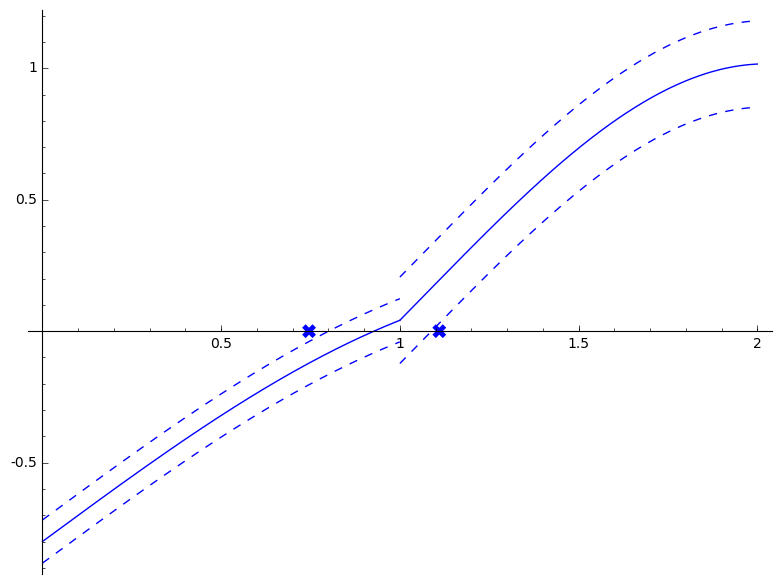

In [86]:
plt += point((a, 0), marker='X', size=100)
plt += point((b, 0), marker='X', size=100)
plt

## Signal generation

In [87]:
load('interval_root_isolation.py')

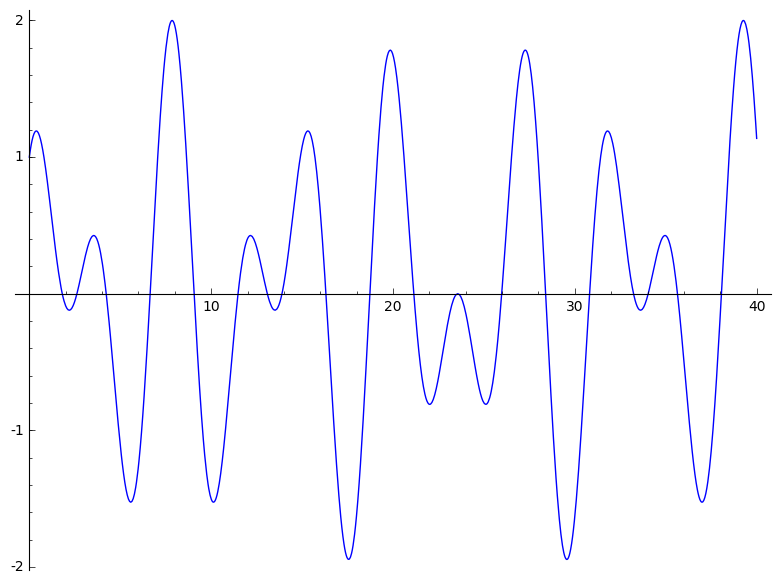

In [88]:
plot(sin(x) + cos(1.6*x), (x,0,40))

In [89]:
g(x) = sin(x) + cos(1.6*x)
g

x |--> cos(1.60000000000000*x) + sin(x)

In [90]:
h(x) = sin(x+RIF(0,0.2)) + cos(1.6*(x+RIF(0,0.2)))
h

x |--> cos(1.60000000000000*x + 1.?) + sin(x + 1.?)

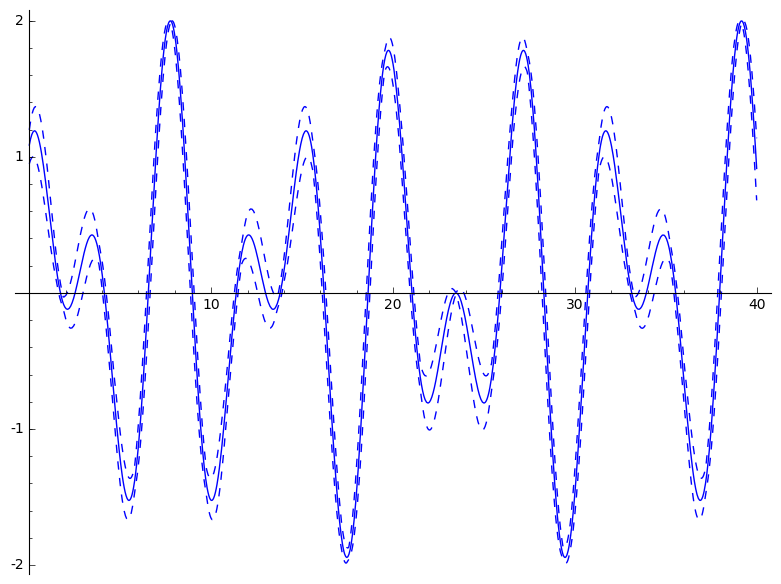

In [91]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=40,
         color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
         linestyle=['--', '-', '--'])

In [92]:
g.derivative()

x |--> cos(x) - 1.60000000000000*sin(1.60000000000000*x)

In [93]:
int_dist(RIF(1,2), RIF(3 + 1/3,4))

2.33333333333334

In [94]:
ta = search_zero(g, g.derivative(), RIF(0,40))
ta.str(style='brackets')

t = [0.00000000000000000 .. 40.000000000000000]
b = 0.?e1
t = [0.38461538461538463 .. 40.000000000000000]
b = 0.?e1
t = [0.84298235669719434 .. 40.000000000000000]
b = 0.?e1
t = [1.2148421071808785 .. 40.000000000000000]
b = 0.?e1
t = [1.4352071807962092 .. 40.000000000000000]
b = 0.?e1
t = [1.5610863921072322 .. 40.000000000000000]
b = 0.?e1
t = [1.6380728918527696 .. 40.000000000000000]
b = 0.?e1
t = [1.6881708565255457 .. 40.000000000000000]
b = 0.?e1
t = [1.7222436090318271 .. 40.000000000000000]
b = 0.?e1
t = [1.7461407002099318 .. 40.000000000000000]
b = 0.?e1
t = [1.7632678705983457 .. 40.000000000000000]
b = 0.?e1
t = [1.7757346511305671 .. 40.000000000000000]
b = 0.?e1
t = [1.7849117381787857 .. 40.000000000000000]
b = 0.?e1
t = [1.7917231520698615 .. 40.000000000000000]
b = 0.?e1
t = [1.7968096695042874 .. 40.000000000000000]
b = 0.?e1
t = [1.8006254079860171 .. 40.000000000000000]
b = 0.?e1
t = [1.8034976116494791 .. 40.000000000000000]
b = 0.?e1
t = [1.8056651316725198 .. 4

'[1.8124573001245383 .. 1.8124573001843374]'

In [95]:
tb = search_zero(g, g.derivative(), RIF(ta.upper('RNDU')+0.0001,40), 1e-9, 0.001, 0.0000001)
tb.str(style='brackets')

t = [1.8125573001843375 .. 40.000000000000000]
b = 0.?e1
t = [1.8125812288465668 .. 40.000000000000000]
b = 0.?e1
t = [1.8126108824516387 .. 40.000000000000000]
b = 0.?e1
t = [1.8126476302317495 .. 40.000000000000000]
b = 0.?e1
t = [1.8126931686497793 .. 40.000000000000000]
b = 0.?e1
t = [1.8127495994707529 .. 40.000000000000000]
b = 0.?e1
t = [1.8128195263885482 .. 40.000000000000000]
b = 0.?e1
t = [1.8129061745796670 .. 40.000000000000000]
b = 0.?e1
t = [1.8130135385653942 .. 40.000000000000000]
b = 0.?e1
t = [1.8131465649951570 .. 40.000000000000000]
b = 0.?e1
t = [1.8133113784600864 .. 40.000000000000000]
b = 0.?e1
t = [1.8135155602540649 .. 40.000000000000000]
b = 0.?e1
t = [1.8137684921702716 .. 40.000000000000000]
b = 0.?e1
t = [1.8140817800040338 .. 40.000000000000000]
b = 0.?e1
t = [1.8144697744697340 .. 40.000000000000000]
b = 0.?e1
t = [1.8149502107534263 .. 40.000000000000000]
b = 0.?e1
t = [1.8155449918977140 .. 40.000000000000000]
b = 0.?e1
t = [1.8162811455651746 .. 40.0

'[2.6179938779914944 .. 2.6179938779914949]'

In [96]:
search_zero(g, g.derivative(), RIF(0,1))

t = [0.00000000000000000 .. 1.0000000000000000]
b = 0.?e1
t = [0.94366535431525422 .. 1.0000000000000000]
b = -1.1?
stopping since presumed converged
t = [0.94366535431525422 .. 1.0000000000000000], fprime(t) = [-1.0596976941318606 .. -1.0102066920815750]


In [97]:
g(23.543737610469488+0.3)

-0.0604894014118164

In [98]:
zs = list(isolate_roots(g, g.derivative(), RIF(0,23), 0.001))
zs

t = [0.00000000000000000 .. 23.000000000000000]
b = 0.?e1
t = [0.38461538461538463 .. 23.000000000000000]
b = 0.?e1
t = [0.84298235669719434 .. 23.000000000000000]
b = 0.?e1
t = [1.2148421071808785 .. 23.000000000000000]
b = 0.?e1
t = [1.4352071807962092 .. 23.000000000000000]
b = 0.?e1
t = [1.5610863921072322 .. 23.000000000000000]
b = 0.?e1
t = [1.6380728918527696 .. 23.000000000000000]
b = 0.?e1
t = [1.6881708565255457 .. 23.000000000000000]
b = 0.?e1
t = [1.7222436090318271 .. 23.000000000000000]
b = 0.?e1
t = [1.7461407002099318 .. 23.000000000000000]
b = 0.?e1
t = [1.7632678705983457 .. 23.000000000000000]
b = 0.?e1
t = [1.7757346511305671 .. 23.000000000000000]
b = 0.?e1
t = [1.7849117381787857 .. 23.000000000000000]
b = 0.?e1
t = [1.7917231520698615 .. 23.000000000000000]
b = 0.?e1
t = [1.7968096695042874 .. 23.000000000000000]
b = 0.?e1
t = [1.8006254079860171 .. 23.000000000000000]
b = 0.?e1
t = [1.8034976116494791 .. 23.000000000000000]
b = 0.?e1
t = [1.8056651316725198 .. 2

b = -0.5?
t = [13.089929554751442 .. 13.091413218890671]
b = -0.52?
t = [13.089965743210855 .. 13.089973101784747]
b = -0.5197?
found upper bound!
t = [13.090969390014416 .. 23.000000000000000]
b = 0.?e1
t = [13.091169091870209 .. 23.000000000000000]
b = 0.?e1
t = [13.091408638526994 .. 23.000000000000000]
b = 0.?e1
t = [13.091695964027827 .. 23.000000000000000]
b = 0.?e1
t = [13.092040575294067 .. 23.000000000000000]
b = 0.?e1
t = [13.092453860862057 .. 23.000000000000000]
b = 0.?e1
t = [13.092949458858242 .. 23.000000000000000]
b = 0.?e1
t = [13.093543694969881 .. 23.000000000000000]
b = 0.?e1
t = [13.094256102843749 .. 23.000000000000000]
b = 0.?e1
t = [13.095110041147350 .. 23.000000000000000]
b = 0.?e1
t = [13.096133423390869 .. 23.000000000000000]
b = 0.?e1
t = [13.097359578415723 .. 23.000000000000000]
b = 0.?e1
t = [13.098828261009833 .. 23.000000000000000]
b = 0.?e1
t = [13.100586833094572 .. 23.000000000000000]
b = 0.?e1
t = [13.102691635851860 .. 23.000000000000000]
b = 0.?e

t = [21.145333525799305 .. 21.178130141643156]
b = -1.7?
t = [21.145333525799305 .. 21.146159326749360]
b = -1.73?
t = [21.145334642169874 .. 21.145335694678011]
b = -1.72412?
found upper bound!
t = [21.146335168393363 .. 23.000000000000000]
b = 0.?e1
t = [21.147950224465887 .. 23.000000000000000]
b = 0.?e1
t = [21.152171367981839 .. 23.000000000000000]
b = 0.?e1
t = [21.163190221430028 .. 23.000000000000000]
b = 0.?e1
t = [21.191859508979050 .. 23.000000000000000]
b = 0.?e1
t = [21.265787843217040 .. 23.000000000000000]
b = 0.?e1
t = [21.451567247322728 .. 23.000000000000000]
b = 0.?e1
t = [21.881429492549589 .. 23.000000000000000]
b = 0.?e1
t = [22.621464190491142 .. 23.000000000000000]
b = 1.?
stopping since presumed converged
t = [22.621464190491142 .. 23.000000000000000], fprime(t) = [0.44459769674724147 .. 1.0636805748532885]


[1.8124573002?,
 2.6179938780?,
 4.229067034?,
 6.6456767672092?,
 9.062286500740?,
 11.4788962342704?,
 13.0899693900?,
 13.89550596780101?,
 16.31211570133162?,
 18.728725434863?,
 21.145335168393?]

z = [1.8124573001245383 .. 1.8124573001843374]
z = [2.6179938779747695 .. 2.6179938780021237]
z = [4.2290670335651698 .. 4.2290670337510435]
z = [6.6456767672091432 .. 6.6456767672092019]
z = [9.0622865007393134 .. 9.0622865007403509]
z = [11.478896234270349 .. 11.478896234270471]
z = [13.089969389920847 .. 13.089969390014416]
z = [13.895505967801007 .. 13.895505967801010]
z = [16.312115701331617 .. 16.312115701331621]
z = [18.728725434862088 .. 18.728725434862370]
z = [21.145335168392502 .. 21.145335168393363]


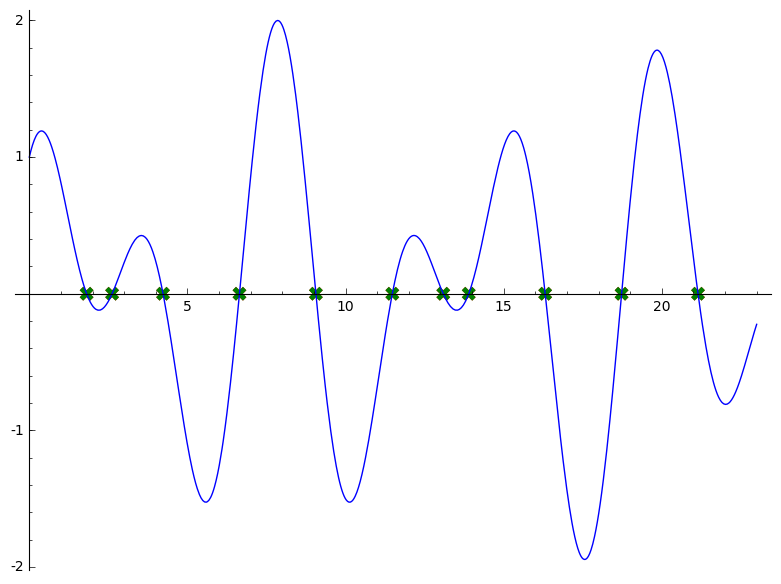

In [99]:
p =  plot(g, (0,23))
for z in zs:
    print 'z =', z.str(style='brackets')
    p += point((z.lower(), 0), marker='X', size=100, color='red')
    p += point((z.upper(), 0), marker='X', size=100, color='green')
p

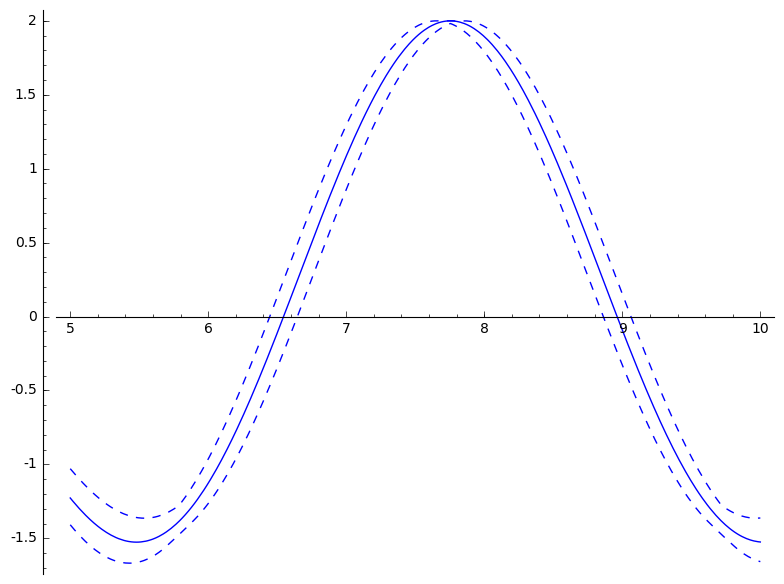

In [100]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=5, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])

In [101]:
RIF(h(6.4456766511496752)).str(style='brackets')

'[-0.46895127350575977 .. -2.8214554792516111e-7]'

In [102]:
RIF(h(6.4456766511496753)).str(style='brackets')

'[-0.46895127350575889 .. -2.8214554709249384e-7]'

In [103]:
zs = list(isolate_roots(h, h.derivative(), RIF(5,10), 0.001))
zs

t = [5.0000000000000000 .. 10.000000000000000]
b = 0.?e1
t = [5.3957518036649094 .. 10.000000000000000]
b = 0.?e1
t = [5.9100907541399170 .. 10.000000000000000]
b = 0.?e1
t = [6.3374501725412635 .. 10.000000000000000]
b = 0.?e1
t = [6.4370717951898406 .. 10.000000000000000]
b = 0.?e1
t = [6.4451462110556692 .. 10.000000000000000]
b = 0.?e1
t = [6.4456447691632448 .. 10.000000000000000]
b = 0.?e1
t = [6.4456748400390857 .. 10.000000000000000]
b = 0.?e1
found lower bound!
t = [6.4456766511496752 .. 6.7078030104497213]
b = 3.?
t = [6.4456766511496752 .. 6.6490795269096826]
b = 3.?
t = [6.4456766511496752 .. 6.6458791055151121]
b = 3.?
t = [6.4456766511496752 .. 6.6456888435329633]
b = 3.?
t = [6.4456766511496752 .. 6.6456774881255090]
b = 3.?
found upper bound!
t = [6.6466768102460358 .. 10.000000000000000]
b = 0.?e1
t = [6.6476119728139950 .. 10.000000000000000]
b = 0.?e1
t = [6.6494218176741570 .. 10.000000000000000]
b = 0.?e1
t = [6.6529249766819154 .. 10.000000000000000]
b = 0.?e1
t =

[7.?, 9.?]

z = [6.4456766511496752 .. 6.6456768102460356]
z = [8.8622863440827313 .. 9.0622865643120357]


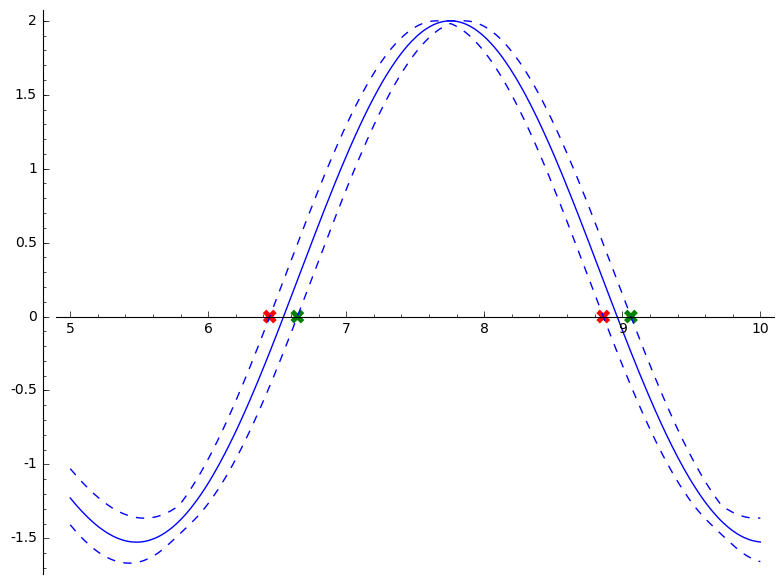

In [104]:
p = plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=5, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])
for z in zs:
    print 'z =', z.str(style='brackets')
    p += point((z.lower(), 0), marker='X', size=100, color='red')
    p += point((z.upper(), 0), marker='X', size=100, color='green')
p

In [105]:
search_zero(seq2, seq2.map(lambda x: x.derivative()), RIF(0.5,1.5)).str(style='brackets')

t = [0.50000000000000000 .. 1.5000000000000000]
b = 1.?e1
t = [0.60243165119724373 .. 1.4411034891747381]
b = 1.?e1
t = [0.67021730006802027 .. 1.3319546525971516]
b = 1.?e1
t = [0.71728066920076805 .. 1.2688908573310201]
b = 1.?
t = [0.74823450000825941 .. 1.2298664986376800]
b = 1.?
t = [0.76803648895159715 .. 1.2064507456479848]
b = 1.?
t = [0.78048603830030671 .. 1.1924392961609128]
b = 1.?
t = [0.78823508068342706 .. 1.1840246582523526]
b = 1.?
t = [0.79303091856883956 .. 1.1789426139218473]
b = 1.?
t = [0.79598934067094118 .. 1.1758575624638308]
b = 1.?
t = [0.79781083931913832 .. 1.1739775274735412]
b = 1.?
t = [0.79893107364064763 .. 1.1728287614101594]
b = 1.?
t = [0.79961956181355187 .. 1.1721255869976921]
b = 1.?
t = [0.80004252985159296 .. 1.1716946784624430]
b = 1.?
t = [0.80030231324085254 .. 1.1714304277394541]
b = 1.?
t = [0.80046184597425107 .. 1.1712683064625789]
b = 1.?
t = [0.80055980585525177 .. 1.1711688155709659]
b = 1.?
t = [0.80061995399576479 .. 1.171107749438

'[0.80070202647999721 .. 1.0884727018838710]'

In [106]:
sigg = to_signal(g, g.derivative(), RIF(0,23))

t = [0.00000000000000000 .. 23.000000000000000]
b = 0.?e1
t = [0.38461538461538463 .. 23.000000000000000]
b = 0.?e1
t = [0.84298235669719434 .. 23.000000000000000]
b = 0.?e1
t = [1.2148421071808785 .. 23.000000000000000]
b = 0.?e1
t = [1.4352071807962092 .. 23.000000000000000]
b = 0.?e1
t = [1.5610863921072322 .. 23.000000000000000]
b = 0.?e1
t = [1.6380728918527696 .. 23.000000000000000]
b = 0.?e1
t = [1.6881708565255457 .. 23.000000000000000]
b = 0.?e1
t = [1.7222436090318271 .. 23.000000000000000]
b = 0.?e1
t = [1.7461407002099318 .. 23.000000000000000]
b = 0.?e1
t = [1.7632678705983457 .. 23.000000000000000]
b = 0.?e1
t = [1.7757346511305671 .. 23.000000000000000]
b = 0.?e1
t = [1.7849117381787857 .. 23.000000000000000]
b = 0.?e1
t = [1.7917231520698615 .. 23.000000000000000]
b = 0.?e1
t = [1.7968096695042874 .. 23.000000000000000]
b = 0.?e1
t = [1.8006254079860171 .. 23.000000000000000]
b = 0.?e1
t = [1.8034976116494791 .. 23.000000000000000]
b = 0.?e1
t = [1.8056651316725198 .. 2

t = [11.483492561988205 .. 23.000000000000000]
b = 0.?e1
t = [11.485622955375113 .. 23.000000000000000]
b = 0.?e1
t = [11.488736952758133 .. 23.000000000000000]
b = 0.?e1
t = [11.493284294539698 .. 23.000000000000000]
b = 0.?e1
t = [11.499915319617725 .. 23.000000000000000]
b = 0.?e1
t = [11.509564622480906 .. 23.000000000000000]
b = 0.?e1
t = [11.523562779624361 .. 23.000000000000000]
b = 0.?e1
t = [11.543777174465562 .. 23.000000000000000]
b = 0.?e1
t = [11.572770596516029 .. 23.000000000000000]
b = 0.?e1
t = [11.613935944974004 .. 23.000000000000000]
b = 0.?e1
t = [11.671501038514387 .. 23.000000000000000]
b = 0.?e1
t = [11.750182645249211 .. 23.000000000000000]
b = 0.?e1
t = [11.854123766208701 .. 23.000000000000000]
b = 0.?e1
t = [11.984747743211116 .. 23.000000000000000]
b = 0.?e1
t = [12.137800549922539 .. 23.000000000000000]
b = 0.?e1
t = [12.301581651344790 .. 23.000000000000000]
b = 0.?e1
t = [12.459647822717332 .. 23.000000000000000]
b = 0.?e1
t = [12.597960704282884 .. 23.0

In [107]:
sigh = to_signal(h, h.derivative(), RIF(5,10))

t = [5.0000000000000000 .. 10.000000000000000]
b = 0.?e1
t = [5.3957518036649094 .. 10.000000000000000]
b = 0.?e1
t = [5.9100907541399170 .. 10.000000000000000]
b = 0.?e1
t = [6.3374501725412635 .. 10.000000000000000]
b = 0.?e1
t = [6.4370717951898406 .. 10.000000000000000]
b = 0.?e1
t = [6.4451462110556692 .. 10.000000000000000]
b = 0.?e1
t = [6.4456447691632448 .. 10.000000000000000]
b = 0.?e1
t = [6.4456748400390857 .. 10.000000000000000]
b = 0.?e1
found lower bound!
t = [6.4456766511496752 .. 6.7078030104497213]
b = 3.?
t = [6.4456766511496752 .. 6.6490795269096826]
b = 3.?
t = [6.4456766511496752 .. 6.6458791055151121]
b = 3.?
t = [6.4456766511496752 .. 6.6456888435329633]
b = 3.?
t = [6.4456766511496752 .. 6.6456774881255090]
b = 3.?
found upper bound!
  I  = [5.0000000000000000 .. 6.4456766511496753]
f(I) = [-1.9589242746631386 .. 0.20910474471639976]
t = [6.6466768102460358 .. 10.000000000000000]
b = 0.?e1
t = [6.6476119728139950 .. 10.000000000000000]
b = 0.?e1
t = [6.64942181

In [108]:
g(x)

cos(1.60000000000000*x) + sin(x)

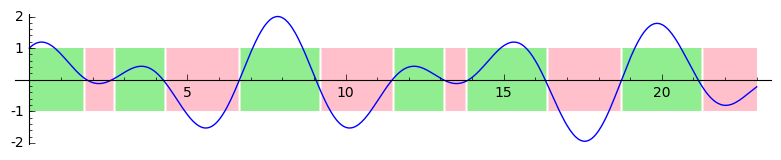

In [109]:
plot(g, (0,23)) + sigg.plot()

In [110]:
#plot(g, (8,10)) + to_signal(g, g.derivative(), RIF(8,10)).plot()

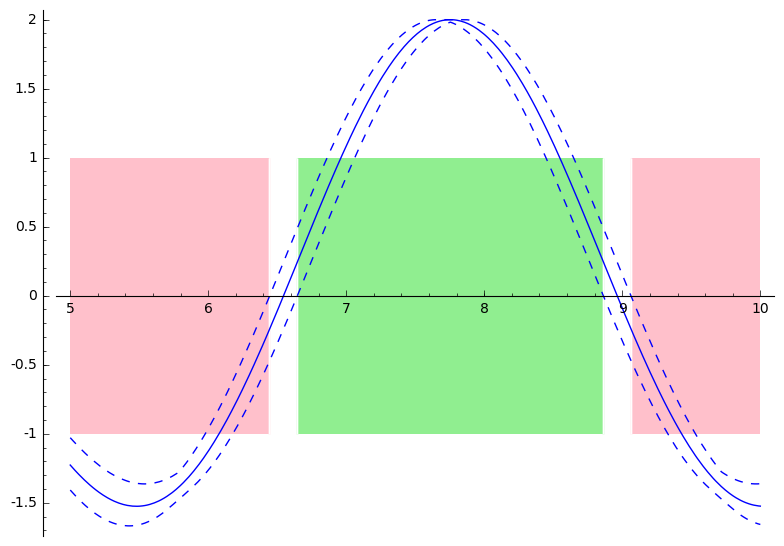

In [111]:
(plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=5, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])
 + sigh.plot())

### Checking some properties

In [112]:
sigg.G(RIF(0,1))(0)

True

In [113]:
sigg.G(RIF(0,2))(0)

False

In [114]:
sigg.F(RIF(0,2))(0)

True

In [115]:
sigh.G(RIF(7,8))(0)

True

In [116]:
sigh.G(RIF(6.5,8))(0) is None

True

In [117]:
sigh.G(RIF(6,8))(0)

False

In [118]:
sigh.F(RIF(6,8))(0)

True

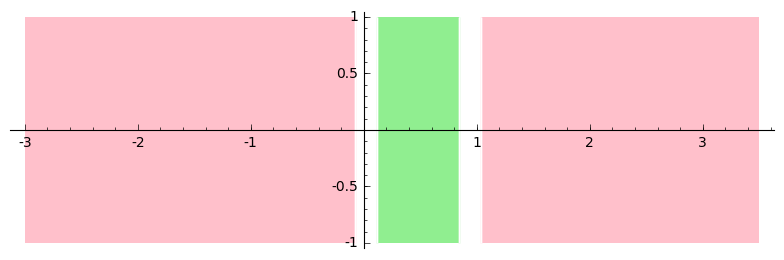

In [119]:
sigh.G(RIF(6.5,8)).plot()

### Lower boundary case

In [120]:
sigh2 = to_signal(h, h.derivative(), RIF(2.25,5))

0 on lower boundary!
t = [2.2500000000000000 .. 2.9761175851900324]
b = 0.?
t = [2.2500000000000000 .. 2.9608257653471815]
b = 0.?
t = [2.2500000000000000 .. 2.9549628506163491]
b = 0.?
t = [2.2500000000000000 .. 2.9527184630231478]
b = 0.?
t = [2.2500000000000000 .. 2.9518595694989101]
b = 0.?
t = [2.2500000000000000 .. 2.9515309124998770]
b = 0.?
t = [2.2500000000000000 .. 2.9514051548567446]
b = 0.?
t = [2.2500000000000000 .. 2.9513570352974568]
b = 0.?
t = [2.2500000000000000 .. 2.9513386230281614]
b = 0.?
found upper bound!
t = [2.9523315778431817 .. 5.0000000000000000]
b = 0.?e1
t = [2.9525633406034006 .. 5.0000000000000000]
b = 0.?e1
t = [2.9528485828532411 .. 5.0000000000000000]
b = 0.?e1
t = [2.9531996444978716 .. 5.0000000000000000]
b = 0.?e1
t = [2.9536317124463544 .. 5.0000000000000000]
b = 0.?e1
t = [2.9541634772624161 .. 5.0000000000000000]
b = 0.?e1
t = [2.9548179411394297 .. 5.0000000000000000]
b = 0.?e1
t = [2.9556234119803730 .. 5.0000000000000000]
b = 0.?e1
t = [2.95

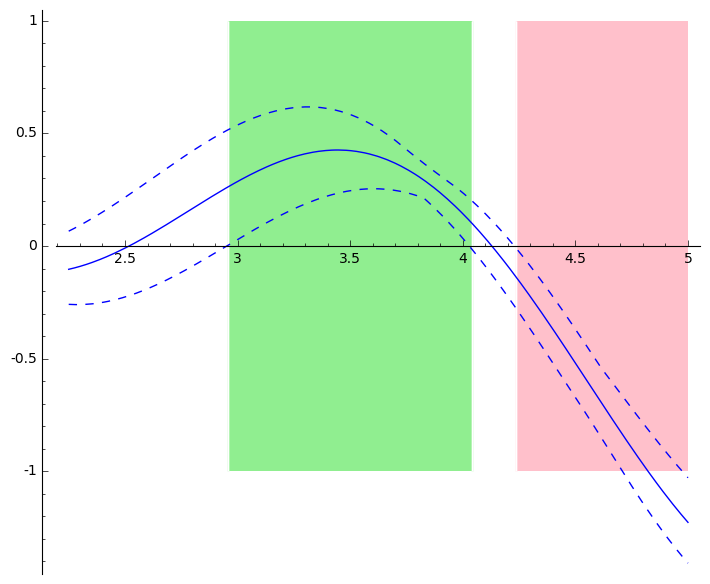

In [121]:
plot([(lambda x: RIF(h(x)).lower()), h(x), (lambda x: RIF(h(x)).upper())], 
         xmin=2.25, xmax=5,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) \
    + sigh2.plot()

### Upper boundary case

In [122]:
sigh3 = to_signal(h, h.derivative(), RIF(0,2.25))

t = [0.00000000000000000 .. 2.2500000000000000]
b = 0.?e1
t = [0.40048219618299535 .. 2.2500000000000000]
b = 0.?e1
t = [0.80666628697194775 .. 2.2500000000000000]
b = 0.?e1
t = [1.0944548276113668 .. 2.2500000000000000]
b = 0.?e1
t = [1.2689054005244879 .. 2.2500000000000000]
b = 0.?e1
t = [1.3831754879076989 .. 2.2500000000000000]
b = 0.?e1
t = [1.4621222102520912 .. 2.2500000000000000]
b = 0.?e1
t = [1.5184229329652099 .. 2.2500000000000000]
b = 0.?e1
t = [1.5542324571522301 .. 2.2500000000000000]
b = 0.?e1
t = [1.5764451024474224 .. 2.2500000000000000]
b = 0.?e1
t = [1.5902064450405628 .. 2.2500000000000000]
b = 0.?e1
t = [1.5987197742783028 .. 2.2500000000000000]
b = 0.?e1
t = [1.6039803648134571 .. 2.2500000000000000]
b = 0.?e1
t = [1.6072283233044664 .. 2.2500000000000000]
b = 0.?e1
t = [1.6092325450813200 .. 2.2500000000000000]
b = 0.?e1
t = [1.6104688488371174 .. 2.2500000000000000]
b = 0.?e1
t = [1.6112312886823909 .. 2.2500000000000000]
b = 0.?e1
t = [1.6117014250217360 .. 2

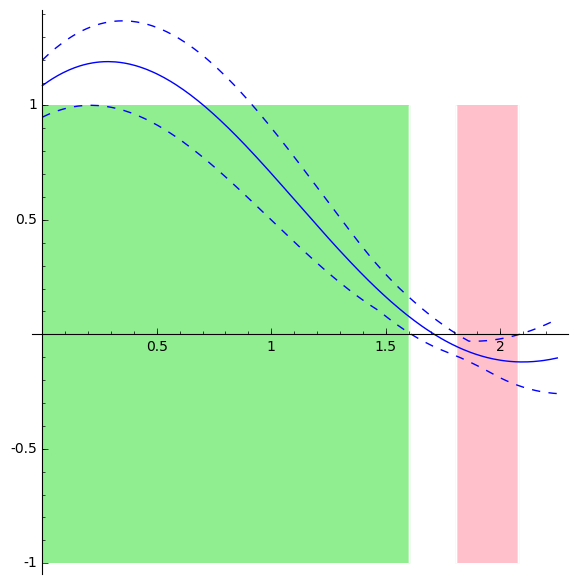

In [123]:
plot([(lambda x: RIF(h(x)).lower()), h(x), (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=2.25,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) \
    + sigh3.plot()

### Dealing with unknown region

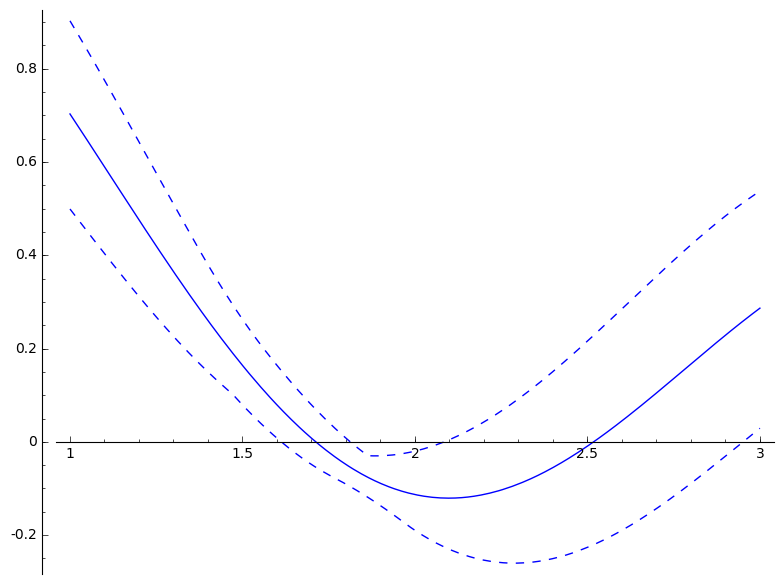

In [124]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=1, xmax=3,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])

In [125]:
sigh = to_signal(h, h.derivative(), RIF(1,3.2))
sigh

t = [1.0000000000000000 .. 3.2000000000000002]
b = 0.?e1
t = [1.1920970727034831 .. 3.2000000000000002]
b = 0.?e1
t = [1.3190778215379983 .. 3.2000000000000002]
b = 0.?e1
t = [1.4079357891233952 .. 3.2000000000000002]
b = 0.?e1
t = [1.4722792287834118 .. 3.2000000000000002]
b = 0.?e1
t = [1.5198676334090330 .. 3.2000000000000002]
b = 0.?e1
t = [1.5511625589676349 .. 3.2000000000000002]
b = 0.?e1
t = [1.5718296448155086 .. 3.2000000000000002]
b = 0.?e1
t = [1.5855091499925435 .. 3.2000000000000002]
b = 0.?e1
t = [1.5945751467119761 .. 3.2000000000000002]
b = 0.?e1
t = [1.6005880512551775 .. 3.2000000000000002]
b = 0.?e1
t = [1.6045778256770379 .. 3.2000000000000002]
b = 0.?e1
t = [1.6072259195825011 .. 3.2000000000000002]
b = 0.?e1
t = [1.6089838227291088 .. 3.2000000000000002]
b = 0.?e1
t = [1.6101509161623586 .. 3.2000000000000002]
b = 0.?e1
t = [1.6109258206528156 .. 3.2000000000000002]
b = 0.?e1
t = [1.6114403516730770 .. 3.2000000000000002]
b = 0.?e1
t = [1.6117820073462891 .. 3.20

Signal([1.0000000000000000 .. 3.2000000000000002], [([1.0000000000000000 .. 1.6124403448348355], True), ([1.8124648242308618 .. 2.0846334832746521], False), ([2.9513325536799346 .. 3.2000000000000002], True)])

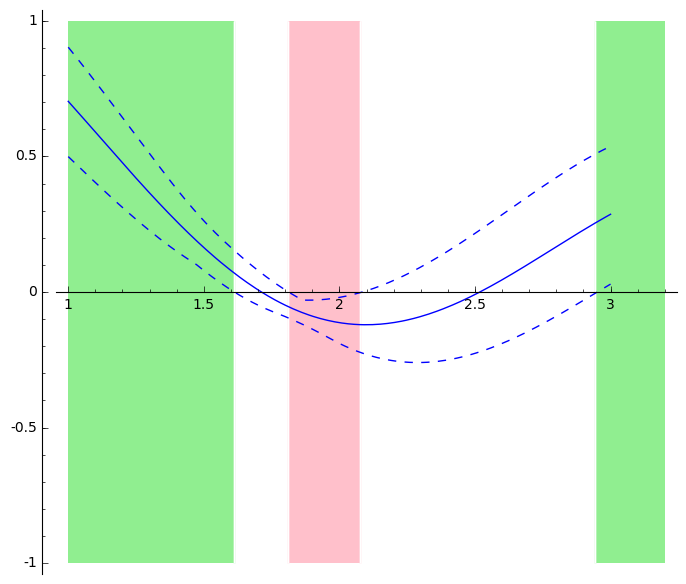

In [126]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=1, xmax=3,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + sigh.plot()

In [127]:
sigh = to_signal(h, h.derivative(), RIF(0,40))

t = [0.00000000000000000 .. 40.000000000000000]
b = 0.?e1
t = [0.36509054541632340 .. 40.000000000000000]
b = 0.?e1
t = [0.74024120745358656 .. 40.000000000000000]
b = 0.?e1
t = [1.0251749022054170 .. 40.000000000000000]
b = 0.?e1
t = [1.2079034804965527 .. 40.000000000000000]
b = 0.?e1
t = [1.3250742365150449 .. 40.000000000000000]
b = 0.?e1
t = [1.4043319534612694 .. 40.000000000000000]
b = 0.?e1
t = [1.4607936626530344 .. 40.000000000000000]
b = 0.?e1
t = [1.5027034087530406 .. 40.000000000000000]
b = 0.?e1
t = [1.5323622589438592 .. 40.000000000000000]
b = 0.?e1
t = [1.5533552029330246 .. 40.000000000000000]
b = 0.?e1
t = [1.5684995404121846 .. 40.000000000000000]
b = 0.?e1
t = [1.5795752003097356 .. 40.000000000000000]
b = 0.?e1
t = [1.5877564659304628 .. 40.000000000000000]
b = 0.?e1
t = [1.5938442727884707 .. 40.000000000000000]
b = 0.?e1
t = [1.5983990606512259 .. 40.000000000000000]
b = 0.?e1
t = [1.6018207643632873 .. 40.000000000000000]
b = 0.?e1
t = [1.6043991133209603 .. 4

t = [4.2305352348894107 .. 40.000000000000000]
b = 0.?e1
t = [4.2312181141431199 .. 40.000000000000000]
b = 0.?e1
t = [4.2322189987078262 .. 40.000000000000000]
b = 0.?e1
t = [4.2336864242035439 .. 40.000000000000000]
b = 0.?e1
t = [4.2358388153836123 .. 40.000000000000000]
b = 0.?e1
t = [4.2389979532648807 .. 40.000000000000000]
b = 0.?e1
t = [4.2436391302087699 .. 40.000000000000000]
b = 0.?e1
t = [4.2504670547540079 .. 40.000000000000000]
b = 0.?e1
t = [4.2605322874614000 .. 40.000000000000000]
b = 0.?e1
t = [4.2754131110009403 .. 40.000000000000000]
b = 0.?e1
t = [4.2975063115889868 .. 40.000000000000000]
b = 0.?e1
t = [4.3305054880499449 .. 40.000000000000000]
b = 0.?e1
t = [4.3802130198386945 .. 40.000000000000000]
b = 0.?e1
t = [4.4559586815745539 .. 40.000000000000000]
b = 0.?e1
t = [4.5731046592080932 .. 40.000000000000000]
b = 0.?e1
t = [4.7572365328168499 .. 40.000000000000000]
b = 0.?e1
t = [5.0380588603631730 .. 40.000000000000000]
b = 0.?e1
t = [5.4497616593030393 .. 40.0

b = 0.?e1
t = [13.902492670320375 .. 40.000000000000000]
b = 0.?e1
t = [13.904178889476902 .. 40.000000000000000]
b = 0.?e1
t = [13.906276314148266 .. 40.000000000000000]
b = 0.?e1
t = [13.908887516786853 .. 40.000000000000000]
b = 0.?e1
t = [13.912141899737372 .. 40.000000000000000]
b = 0.?e1
t = [13.916203385979976 .. 40.000000000000000]
b = 0.?e1
t = [13.921280673916351 .. 40.000000000000000]
b = 0.?e1
t = [13.927641097505500 .. 40.000000000000000]
b = 0.?e1
t = [13.935629649045530 .. 40.000000000000000]
b = 0.?e1
t = [13.945695540233950 .. 40.000000000000000]
b = 0.?e1
t = [13.958430000829389 .. 40.000000000000000]
b = 0.?e1
t = [13.974621198905330 .. 40.000000000000000]
b = 0.?e1
t = [13.995335845313316 .. 40.000000000000000]
b = 0.?e1
t = [14.022043356435370 .. 40.000000000000000]
b = 0.?e1
t = [14.056809440533337 .. 40.000000000000000]
b = 0.?e1
t = [14.101096869678102 .. 40.000000000000000]
b = 0.?e1
t = [14.156873782607183 .. 40.000000000000000]
b = 0.?e1
t = [14.2283648874396

t = [28.195117375915664 .. 40.000000000000000]
b = 0.?e1
t = [28.195164026272397 .. 40.000000000000000]
b = 0.?e1
found lower bound!
t = [28.195164366485908 .. 28.477216010150766]
b = -3.?
t = [28.195164366485908 .. 28.395698653306017]
b = -3.?
t = [28.195164366485908 .. 28.395168254245875]
b = -3.?
found upper bound!
  I  = [25.978555743570915 .. 28.195164366485909]
f(I) = [-0.86904625023687910 .. 2.0000000000000000]
t = [28.396164397312052 .. 40.000000000000000]
b = 0.?e1
t = [28.397157170145717 .. 40.000000000000000]
b = 0.?e1
t = [28.399135582580687 .. 40.000000000000000]
b = 0.?e1
t = [28.403078391524854 .. 40.000000000000000]
b = 0.?e1
t = [28.410936815978416 .. 40.000000000000000]
b = 0.?e1
t = [28.426601986822294 .. 40.000000000000000]
b = 0.?e1
t = [28.457836042747139 .. 40.000000000000000]
b = 0.?e1
t = [28.520112845000227 .. 40.000000000000000]
b = 0.?e1
t = [28.644080770942391 .. 40.000000000000000]
b = 0.?e1
t = [28.888415309492909 .. 40.000000000000000]
b = 0.?e1
t = [29.

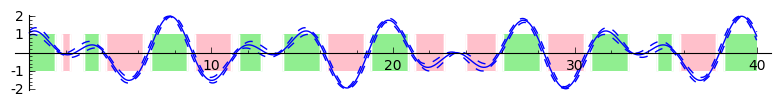

In [128]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=40,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + sigh.plot()

t = [0.00000000000000000 .. 10.000000000000000]
b = 0.?e1
t = [0.36509054541632340 .. 10.000000000000000]
b = 0.?e1
t = [0.74024120745358656 .. 10.000000000000000]
b = 0.?e1
t = [1.0251749022054170 .. 10.000000000000000]
b = 0.?e1
t = [1.2079034804965527 .. 10.000000000000000]
b = 0.?e1
t = [1.3250742365150449 .. 10.000000000000000]
b = 0.?e1
t = [1.4043319534612694 .. 10.000000000000000]
b = 0.?e1
t = [1.4607936626530344 .. 10.000000000000000]
b = 0.?e1
t = [1.5027034087530406 .. 10.000000000000000]
b = 0.?e1
t = [1.5323622589438592 .. 10.000000000000000]
b = 0.?e1
t = [1.5533552029330246 .. 10.000000000000000]
b = 0.?e1
t = [1.5684995404121846 .. 10.000000000000000]
b = 0.?e1
t = [1.5795752003097356 .. 10.000000000000000]
b = 0.?e1
t = [1.5877564659304628 .. 10.000000000000000]
b = 0.?e1
t = [1.5938442727884707 .. 10.000000000000000]
b = 0.?e1
t = [1.5983990606512259 .. 10.000000000000000]
b = 0.?e1
t = [1.6018207643632873 .. 10.000000000000000]
b = 0.?e1
t = [1.6043991133209603 .. 1

t = [6.4456530515197156 .. 10.000000000000000]
b = 0.?e1
t = [6.4456753388992718 .. 10.000000000000000]
b = 0.?e1
found lower bound!
t = [6.4456766811925305 .. 6.7078030417124364]
b = 3.?
t = [6.4456766811925305 .. 6.6490795283787270]
b = 3.?
t = [6.4456766811925305 .. 6.6458791055960989]
b = 3.?
t = [6.4456766811925305 .. 6.6456888435374380]
b = 3.?
t = [6.4456766811925305 .. 6.6456774881257550]
b = 3.?
found upper bound!
  I  = [4.2290692261671241 .. 6.4456766811925306]
f(I) = [-2.0000000000000000 .. 1.2400592020229553]
t = [6.6466768102460482 .. 10.000000000000000]
b = 0.?e1
t = [6.6476119728140190 .. 10.000000000000000]
b = 0.?e1
t = [6.6494218176742032 .. 10.000000000000000]
b = 0.?e1
t = [6.6529249766820051 .. 10.000000000000000]
b = 0.?e1
t = [6.6597076427875077 .. 10.000000000000000]
b = 0.?e1
t = [6.6728468373041671 .. 10.000000000000000]
b = 0.?e1
t = [6.6983236833485326 .. 10.000000000000000]
b = 0.?e1
t = [6.7477994638543856 .. 10.000000000000000]
b = 0.?e1
t = [6.844066948

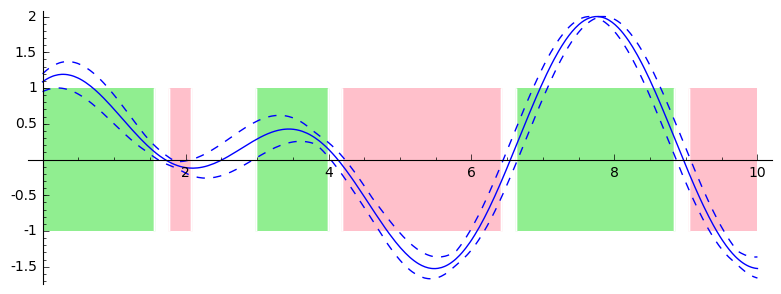

In [129]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + to_signal(h, h.derivative(), RIF(0,10)).plot()

#### Properties of uncertain trace

$\mathrel{\mathbf F_{[2,6]}} (x > 0)$

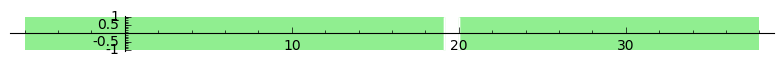

In [130]:
sigh.F(RIF(2,6)).plot()

$\mathrel{\mathbf G_{[2,3]}} (x > 0)$

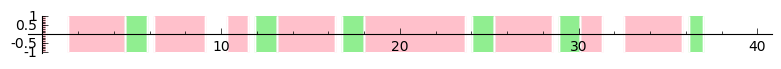

In [131]:
sigh.G(RIF(2,3)).to_domain(RIF(0,40)).plot()

$\mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)$

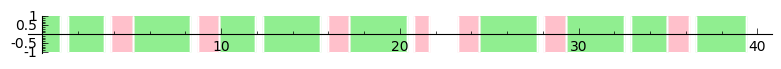

In [132]:
sigh.F(RIF(0.5,1.5)).to_domain(RIF(0,40)).plot()

${\mathrel{\mathbf G_{[2,3]}} (x > 0)} \wedge {\mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)}$

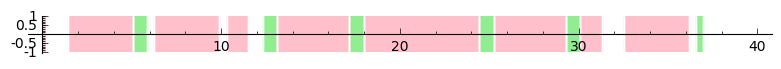

In [133]:
(sigh.G(RIF(2,3)) & sigh.F(RIF(0.5,1.5))).to_domain(RIF(0,40)).plot()

${\mathrel{\mathbf G_{[2,3]}} (x > 0)} \vee {\mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)}$

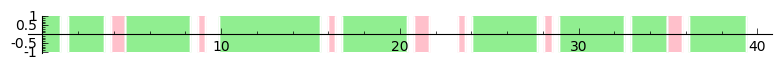

In [134]:
(sigh.G(RIF(2,3)) | sigh.F(RIF(0.5,1.5))).to_domain(RIF(0,40)).plot()

$\left(
    \mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)
 \right)
 \mathrel{\mathbf U_{[0.5,2]}}
 \left(
     \mathrel{\mathbf G_{[2,3]}} (x > 0)
 \right)$

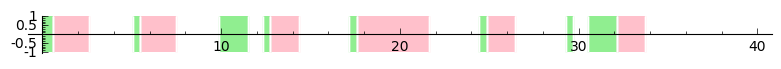

In [135]:
sigh.F(RIF(0.5,1.5)).U(RIF(0.5,2), sigh.G(RIF(2,3))).to_domain(RIF(0,40)).plot()

### Discontinuities

In [136]:
R.<x> = QQ[]

In [137]:
seq = TMSeq([(RIF(0,1), sinTM), (RIF(1,2), sinTM.mul(TM(x, RIF(0)), RIF(1,2)))])

t = [0.00000000000000000 .. 2.0000000000000000]
b = 0.?e1
t = [0.22305659186139367 .. 2.0000000000000000]
b = 0.?e1
t = [0.37737681148048890 .. 2.0000000000000000]
b = 0.?e1
t = [0.48593577726979125 .. 2.0000000000000000]
b = 0.?e1
t = [0.56387171206445707 .. 2.0000000000000000]
b = 0.?e1
t = [0.62085641541039093 .. 2.0000000000000000]
b = 0.?e1
t = [0.66315324178627454 .. 2.0000000000000000]
b = 0.?e1
t = [0.69492486506506190 .. 2.0000000000000000]
b = 0.?e1
t = [0.71901443097139117 .. 2.0000000000000000]
b = 0.?e1
t = [0.73741283829725245 .. 2.0000000000000000]
b = 0.?e1
t = [0.75154444054863056 .. 2.0000000000000000]
b = 0.?e1
t = [0.76244670643666678 .. 2.0000000000000000]
b = 0.?e1
t = [0.77088651852205702 .. 2.0000000000000000]
b = 0.?e1
t = [0.77743756493495586 .. 2.0000000000000000]
b = 0.?e1
t = [0.78253316164517650 .. 2.0000000000000000]
b = 0.?e1
t = [0.78650313146697969 .. 2.0000000000000000]
b = 0.?e1
t = [0.78960006866564802 .. 2.0000000000000000]
b = 0.?e1
t = [0.7920183

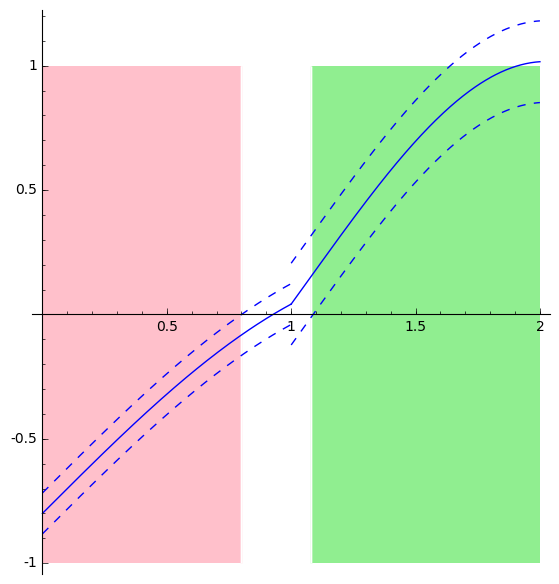

In [138]:
seq2.plot() + to_signal(seq2, seq2.map(lambda x: x.derivative()), RIF(0,2)).plot()

0 on lower boundary!
t = [0.00000000000000000 .. 0.082894013557463093]
b = 1.0?
t = [0.00000000000000000 .. 0.082290373755875571]
b = 1.0?
t = [0.00000000000000000 .. 0.082242649856629935]
b = 1.0?
found upper bound!
t = [0.083238877977612868 .. 2.0000000000000000]
b = 0.?e1
t = [0.084106942554354316 .. 2.0000000000000000]
b = 0.?e1
t = [0.085728240730594595 .. 2.0000000000000000]
b = 0.?e1
t = [0.088756217361355138 .. 2.0000000000000000]
b = 0.?e1
t = [0.094410813845127061 .. 2.0000000000000000]
b = 0.?e1
t = [0.10496857952431262 .. 2.0000000000000000]
b = 0.?e1
t = [0.12467396537926404 .. 2.0000000000000000]
b = 0.?e1
t = [0.16142480133802580 .. 2.0000000000000000]
b = 0.?e1
t = [0.22984824014533056 .. 2.0000000000000000]
b = 0.?e1
t = [0.35670429321091823 .. 2.0000000000000000]
b = 0.?e1
t = [0.58923445315639944 .. 2.0000000000000000]
b = 0.?e1
t = [1.0016091403223750 .. 2.0000000000000000]
b = 0.?e1
t = [1.5937853442959788 .. 2.0000000000000000]
b = 0.?e1
stopping since presumed co

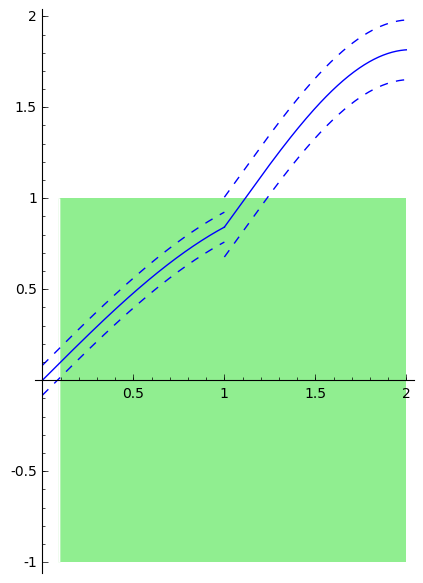

In [139]:
(seq).plot() + to_signal(seq, seq.map(lambda x: x.derivative()), RIF(0,2)).plot()

In [140]:
seq3 = seq.map(lambda x: x - 0.72)

Method can be fooled by discontinuities!

t = [0.00000000000000000 .. 2.0000000000000000]
b = 0.?e1
t = [0.19819843890790508 .. 2.0000000000000000]
b = 0.?e1
t = [0.33521370496208224 .. 2.0000000000000000]
b = 0.?e1
t = [0.43119200484833575 .. 2.0000000000000000]
b = 0.?e1
t = [0.49952088920076526 .. 2.0000000000000000]
b = 0.?e1
t = [0.54887957776491635 .. 2.0000000000000000]
b = 0.?e1
t = [0.58496193630980031 .. 2.0000000000000000]
b = 0.?e1
t = [0.61158703400989944 .. 2.0000000000000000]
b = 0.?e1
t = [0.63137617420562242 .. 2.0000000000000000]
b = 0.?e1
t = [0.64616614469796784 .. 2.0000000000000000]
b = 0.?e1
t = [0.65726663736262869 .. 2.0000000000000000]
b = 0.?e1
t = [0.66562486415731392 .. 2.0000000000000000]
b = 0.?e1
t = [0.67193369417463344 .. 2.0000000000000000]
b = 0.?e1
t = [0.67670449994970560 .. 2.0000000000000000]
b = 0.?e1
t = [0.68031734405611521 .. 2.0000000000000000]
b = 0.?e1
t = [0.68305623045711882 .. 2.0000000000000000]
b = 0.?e1
t = [0.68513427170887319 .. 2.0000000000000000]
b = 0.?e1
t = [0.6867118

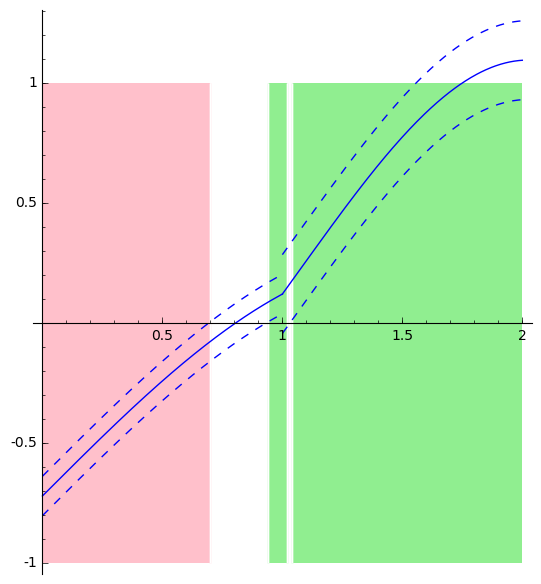

In [141]:
(seq3).plot() + to_signal(seq3, seq3.map(lambda x: x.derivative()), RIF(0,2)).plot()

t = [0.00000000000000000 .. 1.0000000000000000]
b = 1.?
t = [0.41257342565562599 .. 1.0000000000000000]
b = 1.?
t = [0.56579475429632908 .. 1.0000000000000000]
b = 1.?
t = [0.63161930407313571 .. 1.0000000000000000]
b = 1.?
t = [0.66227944056672138 .. 1.0000000000000000]
b = 1.?
t = [0.67711619466854677 .. 1.0000000000000000]
b = 1.?
t = [0.68442917971489913 .. 1.0000000000000000]
b = 1.?
t = [0.68806644488547286 .. 1.0000000000000000]
b = 1.?
t = [0.68988364602154761 .. 1.0000000000000000]
b = 1.?
t = [0.69079356565009131 .. 1.0000000000000000]
b = 1.?
t = [0.69124969653999634 .. 1.0000000000000000]
b = 1.?
t = [0.69147847740414603 .. 1.0000000000000000]
b = 1.?
t = [0.69159325897182899 .. 1.0000000000000000]
b = 1.?
t = [0.69165085412457605 .. 1.0000000000000000]
b = 1.?
t = [0.69167975629702460 .. 1.0000000000000000]
b = 1.?
t = [0.69169426038691739 .. 1.0000000000000000]
b = 1.?
found lower bound!
t = [0.69170153916077081 .. 0.93578765844527335]
b = 1.?
t = [0.69170153916077081 .. 

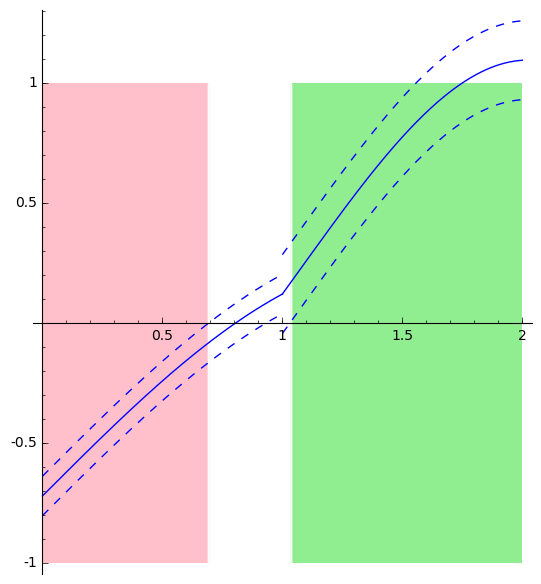

In [142]:
(seq3).plot() + to_signal(seq3, seq3.map(lambda x: x.derivative()), RIF(0,1)).plot() \
              + to_signal(seq3, seq3.map(lambda x: x.derivative()), RIF(1,2)).plot()

t = [0.00000000000000000 .. 1.0000000000000000]
b = 1.?
t = [0.58943449425880023 .. 1.0000000000000000]
b = 1.?
t = [0.67826046215408553 .. 1.0000000000000000]
b = 1.?
t = [0.69021766324743538 .. 1.0000000000000000]
b = 1.?
t = [0.69154852355063811 .. 1.0000000000000000]
b = 1.?
t = [0.69169169121608453 .. 1.0000000000000000]
b = 1.?
t = [0.69170703181905968 .. 1.0000000000000000]
b = 1.?
found lower bound!
t = [0.69170867488342058 .. 0.93579727632130694]
b = 1.?
t = [0.69170867488342058 .. 0.93239664279210699]
b = 1.?
t = [0.69170867488342058 .. 0.93134650332281977]
b = 1.?
t = [0.69170867488342058 .. 0.93102453459454793]
b = 1.?
t = [0.69170867488342058 .. 0.93092603943146213]
b = 1.?
t = [0.69170867488342058 .. 0.93089592879621653]
b = 1.?
found upper bound!
  I  = [0.00000000000000000 .. 0.69170867488342059]
f(I) = [-0.80214588661112841 .. 0.053854561494548967]
t = [0.93188672569275821 .. 1.0000000000000000]
b = 1.?
stopping since presumed converged
t = [0.93188672569275821 .. 1.00

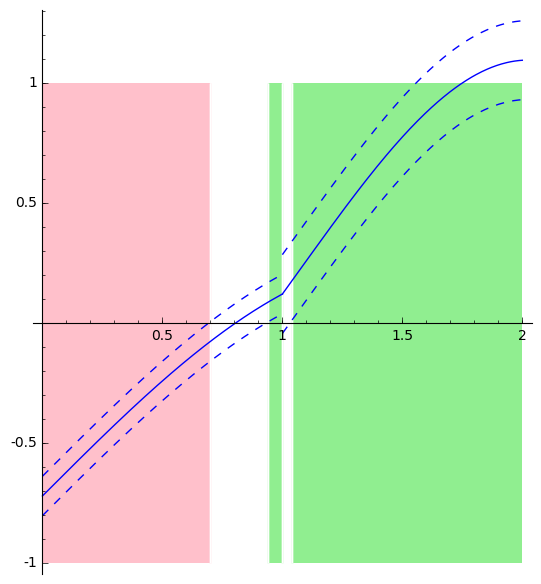

In [143]:
(seq3).plot() + seq3.to_signal().plot()

### Example: topologist's Sine curve

In [144]:
w(x) = sin(1/x) #if x > 0 else 0)

In [145]:
w(0.5)

0.909297426825682

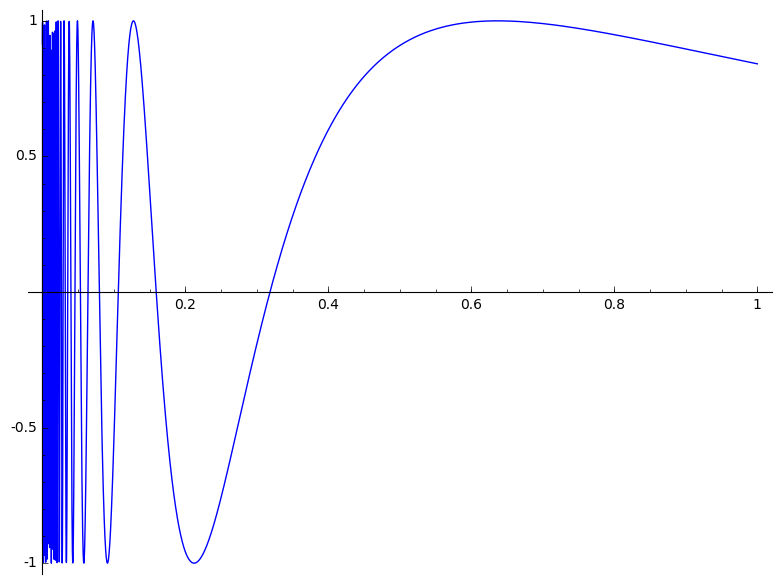

In [146]:
p = plot(w(x), (x,0,1))
p

In [147]:
tsc = to_signal(w, w.derivative(), RIF(0.00000001,1))
tsc

t = [1.0000000000000000e-8 .. 1.0000000000000000]
b = 0.?e16
found lower bound!
t = [1.0000000093163903e-8 .. 0.00010001010000009409]
b = 0.?e16
found upper bound!
  I  = [1.0000000000000000e-8 .. 1.0000000093163904e-8]
f(I) = [0.84739307245149408 .. 1.0000000000000000]
t = [0.0011000101000000297 .. 1.0000000000000000]
b = 0.?e6
found lower bound!
t = [0.0011011205534532096 .. 0.0012121317589877414]
b = 0.?e6
found upper bound!
  I  = [0.00010001010000002972 .. 0.0011011205534532097]
f(I) = [-1.0000000000000000 .. 1.0000000000000000]
t = [0.0022109826675149276 .. 1.0000000000000000]
b = 0.?e6
found lower bound!
t = [0.0022114792680782992 .. 0.0023335940607590819]
b = 0.?e6
found upper bound!
  I  = [0.0012109826675149276 .. 0.0022114792680782993]
f(I) = [-1.0000000000000000 .. 1.0000000000000000]
t = [0.0033289274552688167 .. 1.0000000000000000]
b = 0.?e5
t = [0.0033392392964949049 .. 1.0000000000000000]
b = 0.?e5
found lower bound!
t = [0.0033487296458671227 .. 0.0034822169423257936]


Signal([1.0000000000000000e-8 .. 1.0000000000000000], [([1.0000000000000000e-8 .. 1.0000000093163904e-8], True), ([0.00010001010000002972 .. 0.0011011205534532097], True), ([0.0012109826675149276 .. 0.0022114792680782993], True), ([0.0023289274552688167 .. 0.0033487296458671228], True), ([0.0034622463996617637 .. 0.0044832134034273027], True), ([0.0046132998107004177 .. 0.0056841050486393123], False), ([0.0057875306130068865 .. 0.0069197496607895310], True), ([0.0070735929360863404 .. 0.0081617918926787641], False), ([0.0081617922723588517 .. 0.0093620553041184676], True), ([0.0093620556226013725 .. 0.010610329539339620], False), ([0.010610329539585289 .. 0.011789254906462779], True), ([0.011789257710469723 .. 0.013262911923969853], False), ([0.013262912147373675 .. 0.014468631185943838], True), ([0.014468631233731384 .. 0.015915494308474905], True), ([0.015915494317603046 .. 0.017683882564144157], True), ([0.017683882567381476 .. 0.018724110951276321], False), ([0.018724110952697006 .

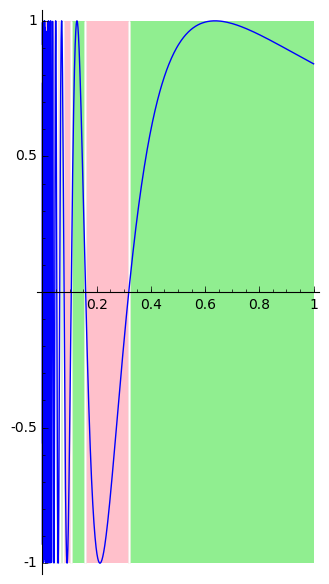

In [148]:
p + tsc.plot()

In [149]:
I = RIF(-0.005,0.005)

In [150]:
tscI = to_signal(w(x+I), w(x+I).derivative(), RIF(0.0000001,2))
tscI

0 on lower boundary!
t = [9.9999999999999995e-8 .. 0.058238501767807844]
b = [-infinity .. +infinity]
found upper bound!
0 on lower boundary!
t = [0.059238501767807844 .. 0.068799873609210333]
b = 0.?e3
t = [0.059238501767807844 .. 0.068700015156400827]
b = 0.?e3
t = [0.059238501767807844 .. 0.068672421700363265]
b = 0.?e3
found upper bound!
  I  = [0.058238501767807843 .. 0.059238501767807845]
f(I) = [-1.0000000000000000 .. 0.14050856070259977]
t = [0.069664841694556584 .. 2.0000000000000000]
b = 0.?e3
t = [0.070673458582329873 .. 2.0000000000000000]
b = 0.?e3
t = [0.072669365664730908 .. 2.0000000000000000]
b = 0.?e3
t = [0.074060682950427184 .. 2.0000000000000000]
b = 0.?e3
t = [0.074452006038195753 .. 2.0000000000000000]
b = 0.?e3
t = [0.074547718928436312 .. 2.0000000000000000]
b = 0.?e3
t = [0.074570452700129269 .. 2.0000000000000000]
b = 0.?e3
found lower bound!
t = [0.074575817744367431 .. 0.085302148378232579]
b = 0.?e3
t = [0.074575817744367431 .. 0.084754360458944425]
b = 0.

/usr/lib64/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib64/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


Signal([9.9999999999999995e-8 .. 2.0000000000000000], [([0.058238501767807843 .. 0.059238501767807845], False), ([0.068664841694556583 .. 0.074575817744367432], True), ([0.084579806604433510 .. 0.10110262232773284], False), ([0.11110372969075793 .. 0.15415416085047895], True), ([0.16415512075263880 .. 0.31330973329277451], False), ([0.32330993939467872 .. 2.0000000000000000], True)])

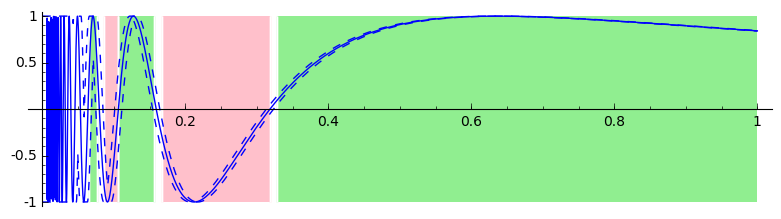

In [151]:
ar = 0.13
plot([(lambda x: RIF(w(x+I)).lower()), w(x), (lambda x: RIF(w(x+I)).upper())], 
         xmin=0, xmax=1,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'], aspect_ratio=ar) + tscI.to_domain(RIF(0,1)).plot(aspect_ratio=ar)

#### Checking some properties

$$\mathrel {\mathbf G_{[0.13,0.14]}} \varphi$$

Signal([-0.13999990000000004 .. 1.8700000000000002], [([-0.081761498232192171 .. -0.070761498232192160], False), ([-0.055420193395566503 .. -0.028897377672267174], False), ([-0.018896270309242070 .. 0.014154160850478937], True), ([0.024155120752638786 .. 0.18330973329277451], False), ([0.19330993939467872 .. 1.8600000000000001], True)])
True


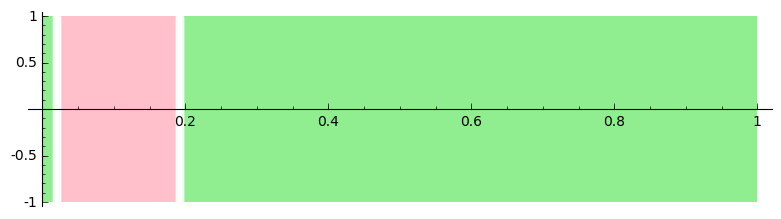

In [152]:
res = tscI.G(RIF(0.13,0.14))
print res
print res(0)
res.to_domain(RIF(0,1)).plot(aspect_ratio=ar)

$$\mathrel {\mathbf F_{[0,0.4]}} \varphi$$

In [153]:
tscI.F(RIF(0,0.4))

Signal([-0.39999990000000008 .. 2.0000000000000000], [([-0.33133515830544347 .. 0.15415416085047895], True)])

$$\mathrel {\mathbf G_{[0,0.4]}} \varphi$$

In [154]:
tscI.G(RIF(0,0.4))(0)

False

$$\mathrel {\mathbf G_{[0.2,0.3]}} \neg \varphi$$

In [155]:
(~tscI).G(RIF(0.2,0.3))(0)

True

Suppose we want to check the property
$$\mathrel {\mathbf X_{0.2}} (\neg \varphi \mathrel{\mathbf U_{[0,0.2]}} \varphi)$$
In practice, this cannot be satisfied by an uncertain trace since there will be a gap in between the $\texttt{True}$ and $\texttt{False}$ intervals. We can however loosen this to the property
$$\mathrel {\mathbf X_{0.2}} (\neg \varphi \mathrel{\mathbf U_{[0,0.2]}} {\mathrel{\mathbf F_{[0,0.1]}} \varphi})$$
which allows a delay before the signal changes truth value.

Signal([-0.19999990000000004 .. 1.8000000000000001], [])
None


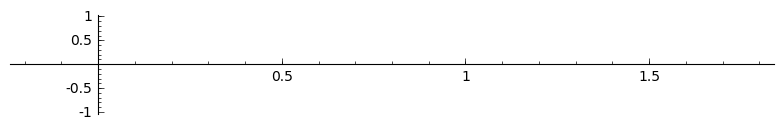

In [156]:
res = ((~tscI).U(RIF(0,0.2),tscI)).F(RIF(0.2))
print res
print res(0)
res.plot(aspect_ratio=ar)

Signal([-0.19999990000000004 .. 1.8000000000000001], [([-0.14176149823219217 .. -0.14076149823219216], True), ([-0.11542019339556651 .. -0.098897377672267181], True), ([-0.035844879247361212 .. 0.11330973329277450], True)])
True


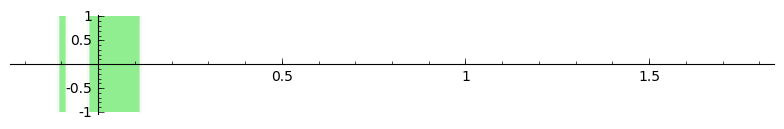

In [157]:
res = ((~tscI).U(RIF(0,0.2),tscI.F(RIF(0,0.1)))).F(RIF(0.2))
print res
print res(0)
res.plot(aspect_ratio=ar)

## Context and given

t = [0.00000000000000000 .. 9.4247779607693812]
b = 0.?e1
t = [0.36509054541632340 .. 9.4247779607693812]
b = 0.?e1
t = [0.74024120745358656 .. 9.4247779607693812]
b = 0.?e1
t = [1.0251749022054170 .. 9.4247779607693812]
b = 0.?e1
t = [1.2079034804965527 .. 9.4247779607693812]
b = 0.?e1
t = [1.3250742365150449 .. 9.4247779607693812]
b = 0.?e1
t = [1.4043319534612694 .. 9.4247779607693812]
b = 0.?e1
t = [1.4607936626530344 .. 9.4247779607693812]
b = 0.?e1
t = [1.5027034087530406 .. 9.4247779607693812]
b = 0.?e1
t = [1.5323622589438592 .. 9.4247779607693812]
b = 0.?e1
t = [1.5533552029330246 .. 9.4247779607693812]
b = 0.?e1
t = [1.5684995404121846 .. 9.4247779607693812]
b = 0.?e1
t = [1.5795752003097356 .. 9.4247779607693812]
b = 0.?e1
t = [1.5877564659304628 .. 9.4247779607693812]
b = 0.?e1
t = [1.5938442727884707 .. 9.4247779607693812]
b = 0.?e1
t = [1.5983990606512259 .. 9.4247779607693812]
b = 0.?e1
t = [1.6018207643632873 .. 9.4247779607693812]
b = 0.?e1
t = [1.6043991133209603 .. 9

t = [4.0290523944088629 .. 9.4247779607693812]
b = 0.?e1
found lower bound!
t = [4.0290591975597873 .. 4.2350918095841737]
b = -1.?
t = [4.0290591975597873 .. 4.2310189914514736]
b = -1.?
t = [4.0290591975597873 .. 4.2296971929897512]
b = -1.?
t = [4.0290591975597873 .. 4.2292702320602658]
b = -1.?
t = [4.0290591975597873 .. 4.2291325311631125]
b = -1.?
t = [4.0290591975597873 .. 4.2290881430615235]
b = -1.?
t = [4.0290591975597873 .. 4.2290738368155508]
b = -1.?
found upper bound!
  I  = [2.9513324944231591 .. 4.0290591975597874]
f(I) = [-0.87570952745154241 .. 1.1891143659858095]
t = [4.2300692261671244 .. 9.4247779607693812]
b = 0.?e1
t = [4.2305352348894107 .. 9.4247779607693812]
b = 0.?e1
t = [4.2312181141431199 .. 9.4247779607693812]
b = 0.?e1
t = [4.2322189987078262 .. 9.4247779607693812]
b = 0.?e1
t = [4.2336864242035439 .. 9.4247779607693812]
b = 0.?e1
t = [4.2358388153836123 .. 9.4247779607693812]
b = 0.?e1
t = [4.2389979532648807 .. 9.4247779607693812]
b = 0.?e1
t = [4.24363

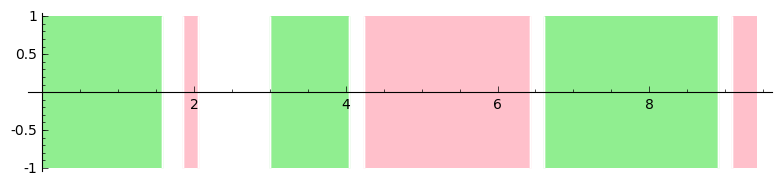

In [158]:
to_signal(h, h.derivative(), RIF(0,3*pi)).plot()

t = [0.00000000000000000 .. 9.4247779607693812]
b = 0.?e1
t = [0.36509054541632340 .. 9.4247779607693812]
b = 0.?e1
t = [0.74024120745358656 .. 9.4247779607693812]
b = 0.?e1
t = [1.0251749022054170 .. 9.4247779607693812]
b = 0.?e1
t = [1.2079034804965527 .. 9.4247779607693812]
b = 0.?e1
t = [1.3250742365150449 .. 9.4247779607693812]
b = 0.?e1
t = [1.4043319534612694 .. 9.4247779607693812]
b = 0.?e1
t = [1.4607936626530344 .. 9.4247779607693812]
b = 0.?e1
t = [1.5027034087530406 .. 9.4247779607693812]
b = 0.?e1
t = [1.5323622589438592 .. 9.4247779607693812]
b = 0.?e1
t = [1.5533552029330246 .. 9.4247779607693812]
b = 0.?e1
t = [1.5684995404121846 .. 9.4247779607693812]
b = 0.?e1
t = [1.5795752003097356 .. 9.4247779607693812]
b = 0.?e1
t = [1.5877564659304628 .. 9.4247779607693812]
b = 0.?e1
t = [1.5938442727884707 .. 9.4247779607693812]
b = 0.?e1
t = [1.5983990606512259 .. 9.4247779607693812]
b = 0.?e1
t = [1.6018207643632873 .. 9.4247779607693812]
b = 0.?e1
t = [1.6043991133209603 .. 9

b = 0.?e1
t = [3.0968333406095718 .. 9.4247779607693812]
b = 0.?e1
t = [3.1297392621184392 .. 9.4247779607693812]
b = 0.?e1
t = [3.1696957147576370 .. 9.4247779607693812]
b = 0.?e1
t = [3.2178973595804167 .. 9.4247779607693812]
b = 0.?e1
t = [3.2754890392409019 .. 9.4247779607693812]
b = 0.?e1
t = [3.3433428352372693 .. 9.4247779607693812]
b = 0.?e1
t = [3.4216982923308929 .. 9.4247779607693812]
b = 0.?e1
t = [3.5096730341813078 .. 9.4247779607693812]
b = 0.?e1
t = [3.6047606109164425 .. 9.4247779607693812]
b = 0.?e1
t = [3.7026053134973579 .. 9.4247779607693812]
b = 0.?e1
t = [3.7974467062719181 .. 9.4247779607693812]
b = 0.?e1
t = [3.8833948447880985 .. 9.4247779607693812]
b = 0.?e1
t = [3.9450224300807770 .. 9.4247779607693812]
b = 0.?e1
t = [3.9821174598652824 .. 9.4247779607693812]
b = 0.?e1
t = [4.0033351575572497 .. 9.4247779607693812]
b = 0.?e1
t = [4.0151149189322685 .. 9.4247779607693812]
b = 0.?e1
t = [4.0215466713824259 .. 9.4247779607693812]
b = 0.?e1
t = [4.02502647037316

b = 0.?e1
t = [3.7026053134973579 .. 9.4247779607693812]
b = 0.?e1
t = [3.7974467062719181 .. 9.4247779607693812]
b = 0.?e1
t = [3.8833948447880985 .. 9.4247779607693812]
b = 0.?e1
t = [3.9450224300807770 .. 9.4247779607693812]
b = 0.?e1
t = [3.9821174598652824 .. 9.4247779607693812]
b = 0.?e1
t = [4.0033351575572497 .. 9.4247779607693812]
b = 0.?e1
t = [4.0151149189322685 .. 9.4247779607693812]
b = 0.?e1
t = [4.0215466713824259 .. 9.4247779607693812]
b = 0.?e1
t = [4.0250264703731613 .. 9.4247779607693812]
b = 0.?e1
t = [4.0268998669490647 .. 9.4247779607693812]
b = 0.?e1
t = [4.0279057504095954 .. 9.4247779607693812]
b = 0.?e1
t = [4.0284450671842151 .. 9.4247779607693812]
b = 0.?e1
t = [4.0287340066303025 .. 9.4247779607693812]
b = 0.?e1
t = [4.0288887425499568 .. 9.4247779607693812]
b = 0.?e1
t = [4.0289715901239411 .. 9.4247779607693812]
b = 0.?e1
t = [4.0290159425354552 .. 9.4247779607693812]
b = 0.?e1
t = [4.0290396850801322 .. 9.4247779607693812]
b = 0.?e1
t = [4.02905239440886

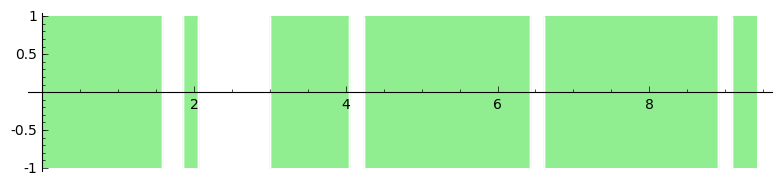

In [159]:
(to_signal(h, h.derivative(), RIF(0,3*pi))
    | ~to_signal(h, h.derivative(), RIF(0,3*pi))).plot()

In [160]:
w = lambda x: RIF(h(x)).max(RIF(-h(x)))

In [161]:
w(3)

1.?

In [162]:
w(0)

1.?

In [163]:
sigor = to_signal((lambda x: max(RIF(h(x)), -RIF(h(x)))),
                  (lambda x: h.derivative(x)
                             if   RIF(h(x)) > 0
                             else -h.derivative()(x)),
                  RIF(0,3*pi))
sigor

t = [0.00000000000000000 .. 9.4247779607693812]
b = 0.?e1
t = [0.36509054541632340 .. 9.4247779607693812]
b = 0.?e1
t = [0.74024120745358656 .. 9.4247779607693812]
b = 0.?e1
t = [1.0251749022054170 .. 9.4247779607693812]
b = 0.?e1
t = [1.2079034804965527 .. 9.4247779607693812]
b = 0.?e1
t = [1.3250742365150449 .. 9.4247779607693812]
b = 0.?e1
t = [1.4043319534612694 .. 9.4247779607693812]
b = 0.?e1
t = [1.4607936626530344 .. 9.4247779607693812]
b = 0.?e1
t = [1.5027034087530406 .. 9.4247779607693812]
b = 0.?e1
t = [1.5323622589438592 .. 9.4247779607693812]
b = 0.?e1
t = [1.5533552029330246 .. 9.4247779607693812]
b = 0.?e1
t = [1.5684995404121846 .. 9.4247779607693812]
b = 0.?e1
t = [1.5795752003097356 .. 9.4247779607693812]
b = 0.?e1
t = [1.5877564659304628 .. 9.4247779607693812]
b = 0.?e1
t = [1.5938442727884707 .. 9.4247779607693812]
b = 0.?e1
t = [1.5983990606512259 .. 9.4247779607693812]
b = 0.?e1
t = [1.6018207643632873 .. 9.4247779607693812]
b = 0.?e1
t = [1.6043991133209603 .. 9

t = [2.0845853505758622 .. 2.9514309669208068]
b = 0.?e1
t = [2.0845853505758622 .. 2.9513410027105441]
b = 0.?e1
t = [2.0845853505758622 .. 2.9513290444876002]
b = 0.?e1
found upper bound!
  I  = [1.8124648124294489 .. 2.0845853505758623]
f(I) = [-0.24411337554032331 .. 0.10002931460408627]
t = [2.9523274549901485 .. 9.4247779607693812]
b = 0.?e1
t = [2.9525582663944245 .. 9.4247779607693812]
b = 0.?e1
t = [2.9528423377696007 .. 9.4247779607693812]
b = 0.?e1
t = [2.9531919583733157 .. 9.4247779607693812]
b = 0.?e1
t = [2.9536222527846489 .. 9.4247779607693812]
b = 0.?e1
t = [2.9541518348621367 .. 9.4247779607693812]
b = 0.?e1
t = [2.9548036124066876 .. 9.4247779607693812]
b = 0.?e1
t = [2.9556057771687238 .. 9.4247779607693812]
b = 0.?e1
t = [2.9565930227327155 .. 9.4247779607693812]
b = 0.?e1
t = [2.9578080424515822 .. 9.4247779607693812]
b = 0.?e1
t = [2.9593033713301846 .. 9.4247779607693812]
b = 0.?e1
t = [2.9611436499425809 .. 9.4247779607693812]
b = 0.?e1
t = [2.9634084054772751

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.00000000000000000 .. 1.6124318328845884], True), ([1.8124648124294489 .. 2.0845853505758623], True), ([2.9513274549901482 .. 4.0290590739976393], True), ([4.2290692261212265 .. 9.4247779607693812], True)])

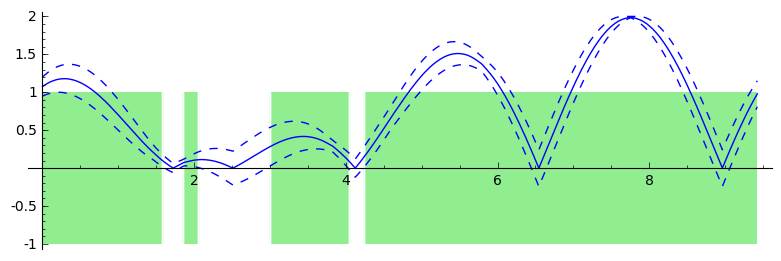

In [164]:
plot([(lambda x: RIF(w(x)).lower()),
      (lambda x: RIF(w(x)).center()),
      (lambda x: RIF(w(x)).upper())], 
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + sigor.plot()

### Context

In [165]:
load('interval_signals.py')

In [166]:
RIF(0,1).absolute_diameter()

1.00000000000000

In [167]:
var('t')

t

In [168]:
x = function('x')(t)
x

x(t)

In [169]:
y(t) = desolve(diff(x,t) == -x, x, [0,1])
y

t |--> e^(-t)

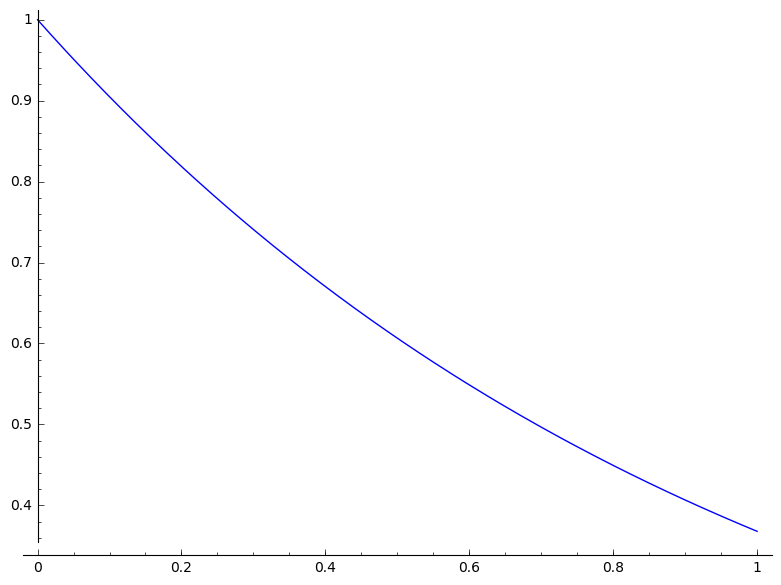

In [170]:
plot(y, (t, 0, 1))

In [171]:
def g(s, fn = None):
    w(t) = y(t - ln(s))
    return w if fn is None else fn(w)

In [172]:
g(y(0.4))

t |--> e^(-t - 0.400000000000000)

In [173]:
def w(t):
    if t < 0.4:
        return y(t)
    else:
        return g(1 + y(0.4))(t)

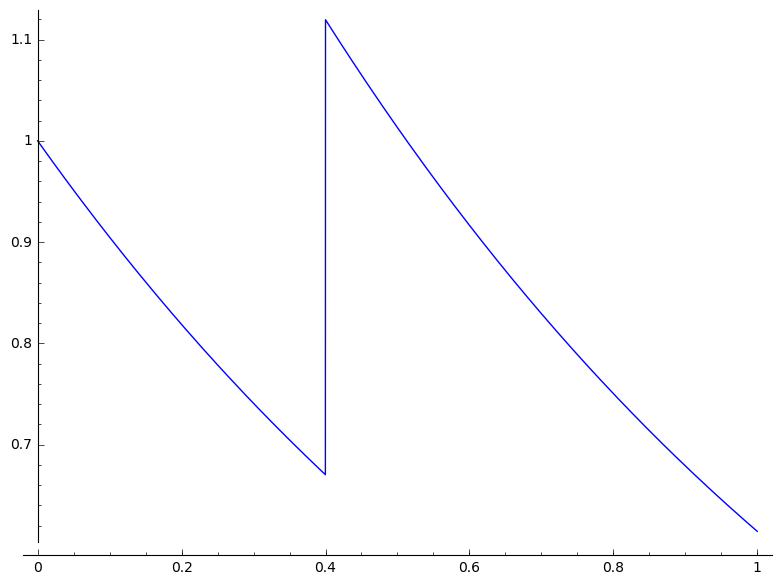

In [174]:
plot(w, (0, 1))

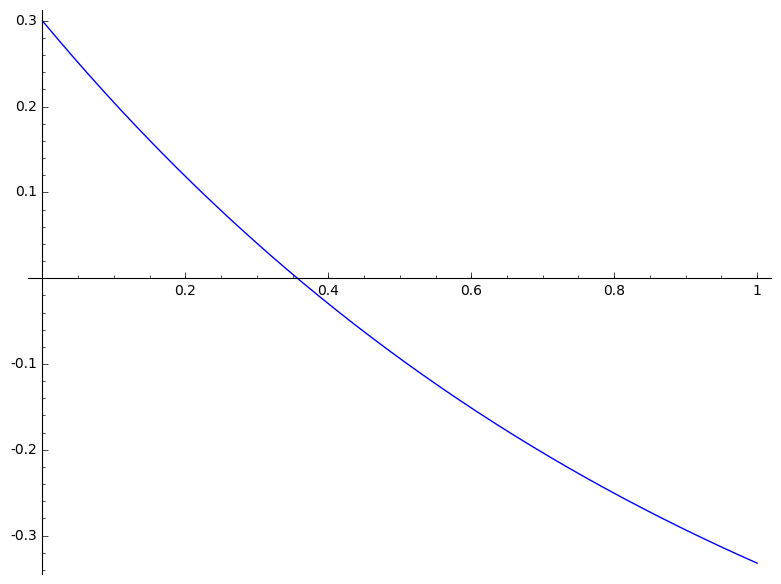

In [175]:
plot((lambda t: g(y(t), (lambda s: s - 0.7))(0)), (0,1))

In [176]:
load('interval_signals.py')

t = [0.00000000000000000 .. 1.0000000000000000]
b = -1.?
t = [0.19999999906867738 .. 0.54365637006234447]
b = -1.?
t = [0.22287779342436633 .. 0.23225983987596458]
b = -0.80?
t = [0.22314351600365589 .. 0.22314602075734070]
b = -0.80000?
found lower bound!
0 on upper boundary!
  I  = [0.00000000000000000 .. 0.22314355131420896]
f(I) = [-3.9115548577939308e-9 .. 0.20000000279396768]
t = [0.22414355131429752 .. 1.0000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414355131429752 .. 1.0000000000000000], fprime(t) = [-0.79920040303841234 .. -0.36787943867966532]


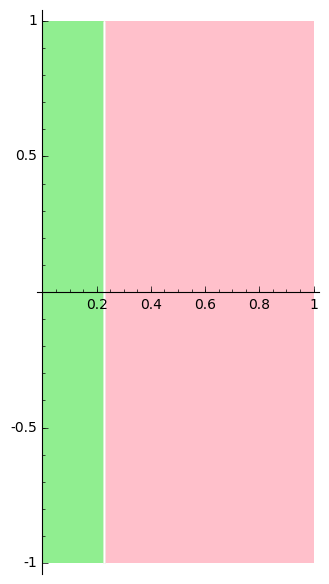

In [177]:
sig = to_signal(lambda t: y(t) - 0.8, y.derivative(), RIF(0,1))
sig.plot()

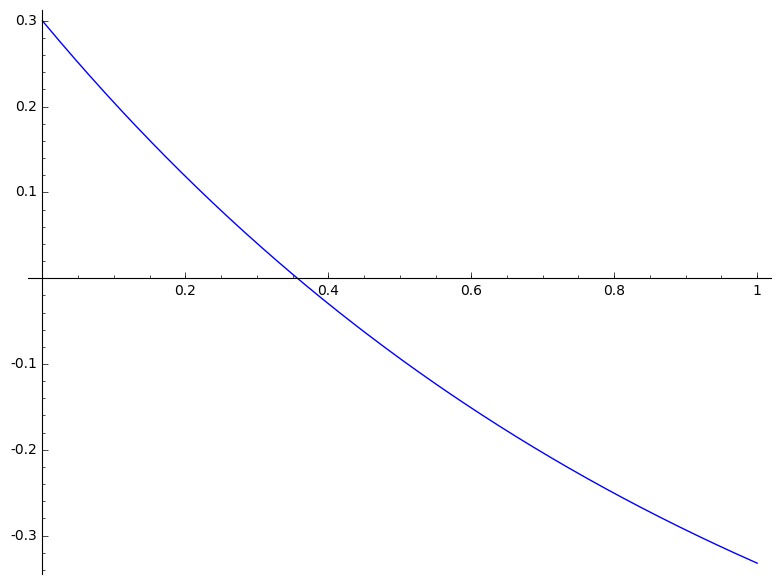

In [178]:
plot((lambda t: g(y(t) + 0.5, (lambda s: s - 1.2))(0)),
     (0,1))

### Simple context

In [179]:
csig = C(RIF(0,1),
         (lambda x: x + 0.5),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10))(0)),
         y,
         g,
         0.001)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656918764283]
b = -1.?
t = [0.00000000000000000 .. 0.22319218180236586]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244546307]
b = -1.?
found upper bound!
t = [0.22414550105913116 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105913116 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.35644531250000000], True), ([0.35742187500000000 .. 1.0000000000000000], False)])

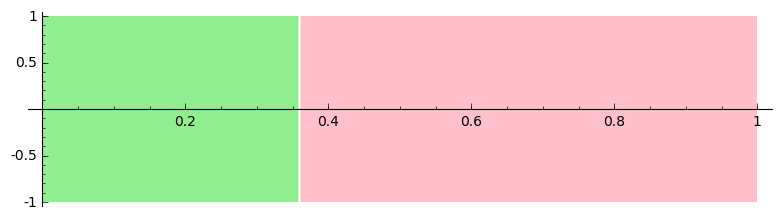

In [180]:
csig.plot(aspect_ratio=ar)

### Temporal contexts

In [181]:
csig = C(RIF(0,1),
         (lambda x: x + 0.5),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).G(RIF(0,0.1))(0)),
         y,
         g,
         0.001)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656918764283]
b = -1.?
t = [0.00000000000000000 .. 0.22319218180236586]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244546307]
b = -1.?
found upper bound!
t = [0.22414550105913116 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105913116 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

t = [0.00000000000000000 .. 0.063891780303481194]
b = -2.?
t = [0.00000000000000000 .. 0.063619141540639482]
b = -2.?
t = [0.00000000000000000 .. 0.063602301712363072]
b = -2.?
found upper bound!
t = [0.064601264061761615 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.064601264061761615 .. 10.000000000000000], fprime(t) = [-1.1988005368039012 .. -0.000050234608352184295]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943867966532 .. 1.1065306612290442]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1065306821838022 .. -0.000039399601519107818]
returning res = False


Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.19042968750000000], True), ([0.19140625000000000 .. 1.0000000000000000], False)])

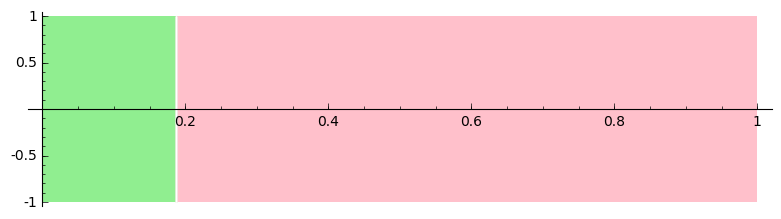

In [182]:
csig.plot(aspect_ratio=ar)

In [183]:
csig = C(RIF(0,1),
         (lambda x: x + 0.5),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.001)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656918764283]
b = -1.?
t = [0.00000000000000000 .. 0.22319218180236586]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244546307]
b = -1.?
found upper bound!
t = [0.22414550105913116 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105913116 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

found upper bound!
t = [0.064601264061761615 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.064601264061761615 .. 10.000000000000000], fprime(t) = [-1.1988005368039012 .. -0.000050234608352184295]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943867966532 .. 1.1065306612290442]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1065306821838022 .. -0.000039399601519107818]
returning res = False


Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.19042968750000000], True), ([0.19140625000000000 .. 1.0000000000000000], False)])

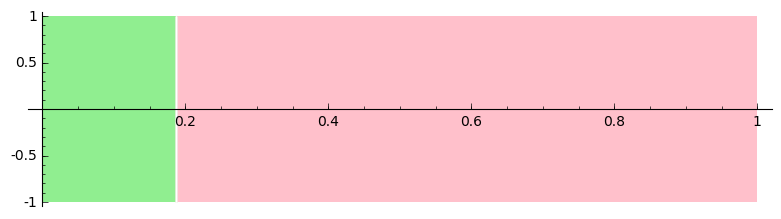

In [184]:
csig.plot(aspect_ratio=ar)

### Uncertain contexts

In [185]:
csig = C(RIF(0,1),
         (lambda x: x + RIF(0.4,0.6)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943821400406 .. 1.6000000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.29054522588902532]
b = -1.?
t = [0.00000000000000000 .. 0.28840093611843904]
b = -1.?
t = [0.00000000000000000 .. 0.28786198568501587]
b = -1.?
t = [0.00000000000000000 .. 0.28772706742918558]
b = -1.?
t = [0.00000000000000000 .. 0.28769332514687385]
b = -1.?
found upper bound!
t = [0.28868488980911677 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28868488980911677 .. 10.000000000000000], fprime(t) = [-1.1987972492352129 .. -0.000034860335290431976]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306561067699 .. 1.6000000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.2905452258

C || f(I) = [1.3248488117009400 .. 1.5321024930104615]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.081488547059572966 .. 10.000000000000000]
b = -1.?
t = [0.096479618164086025 .. 10.000000000000000]
b = -1.?
t = [0.098636292894597327 .. 10.000000000000000]
b = -1.?
t = [0.098930677659537016 .. 10.000000000000000]
b = -1.?
t = [0.098970550292408421 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.098975945491786315 .. 0.24642997558878971]
b = -2.?
t = [0.098975945491786315 .. 0.24460684521914828]
b = -2.?
t = [0.098975945491786315 .. 0.24435833209917072]
b = -2.?
t = [0.098975945491786315 .. 0.24432468050842185]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.098975945491786316]
f(I) = [1.0125339031663571e-6 .. 0.33210249543190007]
t = [0.24532012712662204 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.24532012712662204 .. 10.000000000000000], fprime(t) = [-1.1987997675314546 .. -0.0000601457431

h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.059755915282451797 .. 10.000000000000000]
b = -1.?
t = [0.070131207139481357 .. 10.000000000000000]
b = -1.?
t = [0.071627947188280888 .. 10.000000000000000]
b = -1.?
t = [0.071836246755307475 .. 10.000000000000000]
b = -1.?
t = [0.071865083287352138 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.071869072523292568 .. 0.22273629564079048]
b = -2.?
t = [0.071869072523292568 .. 0.22101508257265504]
b = -2.?
t = [0.071869072523292568 .. 0.22077532165791420]
b = -2.?
t = [0.071869072523292568 .. 0.22074212550726708]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.071869072523292569]
f(I) = [7.6852738861710179e-7 .. 0.29639420956373220]
t = [0.22173753330666468 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22173753330666468 .. 10.000000000000000], fprime(t) = [-1.1987997321411968 .. -0.000058538280427455902]
returning res = None
I  = [0.1171875000000000

t = [0.050418434221551178 .. 0.20216739772142959]
b = -2.?
t = [0.050418434221551178 .. 0.20213907598328341]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.050418434221551179]
f(I) = [5.5804848675400364e-7 .. 0.26881505846977239]
t = [0.20313508900851423 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.20313508900851423 .. 10.000000000000000], fprime(t) = [-1.1987998308613897 .. -0.000057295896112918853]
returning res = None
I  = [0.14843750000000000 .. 0.15625000000000000]
C || f(I) = [1.2553453255444764 .. 1.4620538841933013]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.037854501561649045 .. 10.000000000000000]
b = -1.?
t = [0.044043869643598639 .. 10.000000000000000]
b = -1.?
t = [0.044940884658676495 .. 10.000000000000000]
b = -1.?
t = [0.045068165539680314 .. 10.000000000000000]
b = -1.?
t = [0.045086170082065023 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.045088716426729076 .. 0.19899

b = -1.?
t = [0.0024650082244827824 .. 10.000000000000000]
b = -1.?
t = [0.0028575191058486720 .. 10.000000000000000]
b = -1.?
t = [0.0029195474310771572 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.0029293381730852241 .. 0.17608204428167515]
b = -2.?
t = [0.0029293381730852241 .. 0.17489679624934493]
b = -2.?
t = [0.0029293381730852241 .. 0.17470894408757426]
b = -2.?
t = [0.0029293381730852241 .. 0.17467927927063168]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.0029293381730852242]
f(I) = [2.2027641535249387e-6 .. 0.22902912013232713]
t = [0.17567459745754018 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.17567459745754018 .. 10.000000000000000], fprime(t) = [-1.1987995719537139 .. -0.000054637901484966278]
bisecting [0.18750000000000000 .. 0.21875000000000000] -> [0.18750000000000000 .. 0.20312500000000000], [0.20312500000000000 .. 0.21875000000000000]
I  = [0.18750000000000000 .. 0.20312500000000000]
C || f(I) = [1.216176211461

C || f(I) = [1.1910651089623569 .. 1.3972695119678976]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.15379703382429952]
b = -2.?
t = [0.00000000000000000 .. 0.15242521912931023]
b = -2.?
t = [0.00000000000000000 .. 0.15223046908461341]
b = -2.?
t = [0.00000000000000000 .. 0.15220295151133346]
b = -2.?
found upper bound!
t = [0.15319906643907604 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.15319906643907604 .. 10.000000000000000], fprime(t) = [-1.1987998569384218 .. -0.000054071657359600067]
returning res = None
I  = [0.23437500000000000 .. 0.25000000000000000]
C || f(I) = [1.1788007808849214 .. 1.3910651117563249]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.14897978728963629]
b = -2.?
t = [0.00000000000000000 .. 0.14791798544190494]
b = -2.?
t = [0.00000000000000000 .. 0.14777150295746700]
b = -2.?
t = [0.00000000000000000 .. 0.14775137179900084]
b = -2.?
found upper bound!
t = [0.1487486062150935

t = [0.00000000000000000 .. 0.13108648906300686]
b = -2.?
t = [0.00000000000000000 .. 0.13021811917999096]
b = -2.?
t = [0.00000000000000000 .. 0.13011176444360651]
b = -2.?
t = [0.00000000000000000 .. 0.13009878410250242]
b = -2.?
found upper bound!
t = [0.13109719992412907 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13109719992412907 .. 10.000000000000000], fprime(t) = [-1.1988003579899669 .. -0.000052697025239467620]
returning res = None
I  = [0.27343750000000000 .. 0.28125000000000000]
C || f(I) = [1.1548396000638603 .. 1.3607598835602404]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.12693715629025590]
b = -2.?
t = [0.00000000000000000 .. 0.12586596769379114]
b = -2.?
t = [0.00000000000000000 .. 0.12573877572234602]
b = -2.?
t = [0.00000000000000000 .. 0.12572373997679243]
b = -2.?
found upper bound!
t = [0.12672196406037633 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.12672196406037633 .. 10.00

returning res = False
I  = [0.37500000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306579694150 .. 1.2872892798855902]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.070814351890345573]
b = -1.?
t = [0.00000000000000000 .. 0.070257782866652214]
b = -1.?
t = [0.00000000000000000 .. 0.070219876499631393]
b = -1.?
found upper bound!
t = [0.071217304688047392 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.071217304688047392 .. 10.000000000000000], fprime(t) = [-1.1988003933802248 .. -0.000045695342123508453]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943867966534 .. 1.2065306612290443]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0054931757151547214]
b = -1.?
t = [0.00000000000000000 .. 0.0054278220749665024]
b = -1.?
found upper bound!
t = [0.0064274663828521082 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.006427466382852

Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.070312500000000000], True), ([0.32031250000000000 .. 1.0000000000000000], False)])

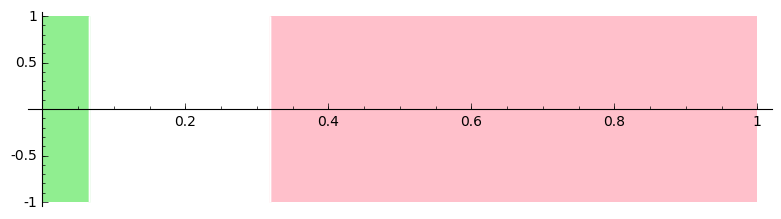

In [186]:
csig.plot(aspect_ratio=ar)

In [187]:
csig = C(RIF(0,1),
         (lambda x: x + RIF(0.5,0.6)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.6000000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.29054522588902532]
b = -1.?
t = [0.00000000000000000 .. 0.28840093611344648]
b = -1.?
t = [0.00000000000000000 .. 0.28786198567908217]
b = -1.?
t = [0.00000000000000000 .. 0.28772706742301630]
b = -1.?
t = [0.00000000000000000 .. 0.28769332514064567]
b = -1.?
found upper bound!
t = [0.28868488922080709 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28868488922080709 .. 10.000000000000000], fprime(t) = [-1.1987972492352129 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.6000000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.2905452258

I  = [0.20312500000000000 .. 0.21093750000000000]
C || f(I) = [1.3098246771842241 .. 1.4161762133240701]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.077550146007453121 .. 10.000000000000000]
b = -1.?
t = [0.086772846912467241 .. 10.000000000000000]
b = -1.?
t = [0.087511444176894728 .. 10.000000000000000]
b = -1.?
t = [0.087567204701466769 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.087571394733590407 .. 0.16725763068680575]
b = -1.2?
t = [0.087571394733590407 .. 0.16576165199109414]
b = -1.2?
t = [0.087571394733590407 .. 0.16564810402565600]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.087571394733590408]
f(I) = [4.0717422966629612e-7 .. 0.21617621481418615]
t = [0.16663957002585644 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16663957002585644 .. 10.000000000000000], fprime(t) = [-1.1987997861579061 .. -0.000059464015066623687]
returning res = None
I  = [0.21093750000000000 .. 0.2

b = -1.?
found upper bound!
t = [0.13989281636741343 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13989281636741343 .. 10.000000000000000], fprime(t) = [-1.1988003207370639 .. -0.000050234608352184295]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.1872892770916223 .. 1.3788007836788894]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.13976615111792926]
b = -2.?
t = [0.00000000000000000 .. 0.13900618557522385]
b = -2.?
t = [0.00000000000000000 .. 0.13890730738126564]
b = -2.?
t = [0.00000000000000000 .. 0.13889447988585066]
b = -2.?
found upper bound!
t = [0.13989281636689898 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13989281636689898 .. 10.000000000000000], fprime(t) = [-1.1988003207370639 .. -0.000053900294005870819]
bisecting [0.2500

f(I) = [1.7620623116165745e-7 .. 0.15483960434794431]
t = [0.12236209347814869 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.12236209347814869 .. 10.000000000000000], fprime(t) = [-1.1987999277189374 .. -0.000056701712310314178]
returning res = None
I  = [0.28906250000000000 .. 0.29687500000000000]
C || f(I) = [1.2431368967518210 .. 1.3489653946831824]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.031977760976827994 .. 10.000000000000000]
b = -1.?
t = [0.035049331360089322 .. 10.000000000000000]
b = -1.?
t = [0.035295397957917397 .. 10.000000000000000]
b = -1.?
t = [0.035314734981389157 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.035316252094374674 .. 0.11754894110595055]
b = -2.?
t = [0.035316252094374674 .. 0.11705828118075733]
b = -2.?
t = [0.035316252094374674 .. 0.11701965753615100]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.035316252094374675]
f(I) = [1.5571713452011692e-7 .. 0.

t = [0.00000000000000000 .. 0.070814351890345573]
b = -2.?
t = [0.00000000000000000 .. 0.070257782866652214]
b = -2.?
t = [0.00000000000000000 .. 0.070219876499603956]
b = -2.?
found upper bound!
t = [0.071217304688019955 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.071217304688019955 .. 10.000000000000000], fprime(t) = [-1.1988003933802248 .. -0.000050234608352184295]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943867966532 .. 1.2065306612290443]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0054931757151547214]
b = -1.?
t = [0.00000000000000000 .. 0.0054278220749665024]
b = -1.?
found upper bound!
t = [0.0064274656109510937 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.0064274656109510937 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000039399601519107818]
returning res = False


Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.18750000000000000], True), ([0.32031250000000000 .. 1.0000000000000000], False)])

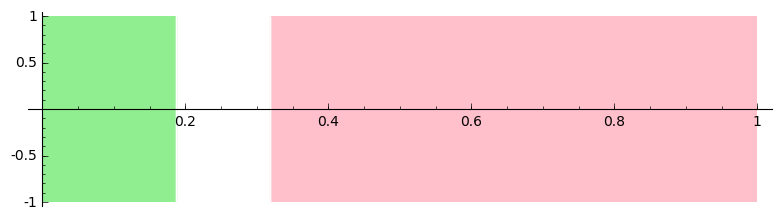

In [188]:
csig.plot(aspect_ratio=ar)

### Splitting uncertain contexts

In [192]:
csig1 = C(RIF(0,1),
         (lambda x: x + RIF(0.4,0.5)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig2 = C(RIF(0,1),
         (lambda x: x + RIF(0.5,0.6)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig = csig1 & csig2

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943821400406 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656980912625]
b = -1.?
t = [0.00000000000000000 .. 0.22319218242384928]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244604063]
b = -1.?
found upper bound!
t = [0.22414550105970390 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105970390 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000034860335290431976]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306561067699 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

f(I) = [6.7912042145401585e-7 .. 0.21051036305725579]
t = [0.16263013279032262 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16263013279032262 .. 10.000000000000000], fprime(t) = [-1.1988005088642240 .. -0.000058223493397235870]
bisecting [0.093750000000000000 .. 0.12500000000000000] -> [0.093750000000000000 .. 0.10937500000000000], [0.10937500000000000 .. 0.12500000000000000]
I  = [0.093750000000000000 .. 0.10937500000000000]
C || f(I) = [1.2963942052796482 .. 1.4105103621259332]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.068339944128782220 .. 10.000000000000000]
b = -1.?
t = [0.076506577476820145 .. 10.000000000000000]
b = -1.?
t = [0.077203526144853928 .. 10.000000000000000]
b = -1.?
t = [0.077260174766715483 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.077264759344267533 .. 0.16166917204579251]
b = -2.?
t = [0.077264759344267533 .. 0.16163320913927002]
b = -2.?
found upper bound!
  I  = [0.000000

b = -2.?
t = [0.050418705600864255 .. 0.13162722449850728]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.050418705600864256]
f(I) = [2.3208558563858616e-7 .. 0.16881505884230142]
t = [0.13262414840763131 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13262414840763131 .. 10.000000000000000], fprime(t) = [-1.1988003039732576 .. -0.000057295896112918853]
returning res = None
I  = [0.14843750000000000 .. 0.15625000000000000]
C || f(I) = [1.2553453255444764 .. 1.3620538841933013]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.040633723681740126 .. 10.000000000000000]
b = -1.?
t = [0.044730946393396128 .. 10.000000000000000]
b = -1.?
t = [0.045061014018707080 .. 10.000000000000000]
b = -1.?
t = [0.045086932302788984 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.045088963176072888 .. 0.12760397721387027]
b = -2.?
t = [0.045088963176072888 .. 0.12674561190102460]
b = -2.?
t = [0.045088963176072888 

C || f(I) = [1.1788007808849214 .. 1.3290291186422110]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.10222608922139355]
b = -2.?
t = [0.00000000000000000 .. 0.10213674531899202]
b = -2.?
found upper bound!
t = [0.10312806661989951 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10312806661989951 .. 10.000000000000000], fprime(t) = [-1.1987994993105531 .. -0.000053514726459980010]
bisecting [0.18750000000000000 .. 0.25000000000000000] -> [0.18750000000000000 .. 0.21875000000000000], [0.21875000000000000 .. 0.25000000000000000]
I  = [0.18750000000000000 .. 0.21875000000000000]
C || f(I) = [1.2035225719213484 .. 1.3290291186422110]
h  = t |--> e^(-t + 0.2?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.0026504825832253621 .. 10.000000000000000]
b = -1.?
t = [0.0029046315070096469 .. 10.000000000000000]
b = -1.?
t = [0.0029286664467977011 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.0029309373643667362 .

C || f(I) = [1.2788007808849215 .. 1.4290291186422111]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.055142876792496860 .. 10.000000000000000]
b = -1.?
t = [0.062680079059824853 .. 10.000000000000000]
b = -1.?
t = [0.063503977634226257 .. 10.000000000000000]
b = -1.?
t = [0.063590966160686226 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.063600115032340226 .. 0.17568048203545864]
b = -2.?
t = [0.063600115032340226 .. 0.17478001095912047]
b = -2.?
t = [0.063600115032340226 .. 0.17468489965889450]
b = -2.?
t = [0.063600115032340226 .. 0.17467489534146985]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.063600115032340227]
f(I) = [1.2882053852525388e-6 .. 0.22902912013232713]
t = [0.17567384329353899 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.17567384329353899 .. 10.000000000000000], fprime(t) = [-1.1988004734739662 .. -0.000058055855333805084]
bisecting [0.18750000000000000 .. 0.25000000000

t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.069303840366929922 .. 10.000000000000000]
b = -1.?
t = [0.077251943447873588 .. 10.000000000000000]
b = -1.?
t = [0.077887802551395407 .. 10.000000000000000]
b = -1.?
t = [0.077936157287822355 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.077939819476558036 .. 0.15790934428464013]
b = -1.2?
t = [0.077939819476558036 .. 0.15675866818244231]
b = -1.2?
t = [0.077939819476558036 .. 0.15667084275994045]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.077939819476558037]
f(I) = [3.5874545578629124e-7 .. 0.20352257713675504]
t = [0.15766419094048186 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.15766419094048186 .. 10.000000000000000], fprime(t) = [-1.1987999649718404 .. -0.000058894045650959014]
returning res = None
I  = [0.22656250000000000 .. 0.23437500000000000]
C || f(I) = [1.2910651089623570 .. 1.3972695119678976]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.0

t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.048608319402670352 .. 10.000000000000000]
b = -1.?
t = [0.053675334233354680 .. 10.000000000000000]
b = -1.?
t = [0.054080522567262950 .. 10.000000000000000]
b = -1.?
t = [0.054111901870432320 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.054114326227760502 .. 0.13497987896127531]
b = -2.?
t = [0.054114326227760502 .. 0.13452542128452375]
b = -2.?
t = [0.054114326227760502 .. 0.13449021258618691]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.054114326227760503]
f(I) = [2.4326145653397190e-7 .. 0.17274011038243776]
t = [0.13548749344924101 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13548749344924101 .. 10.000000000000000], fprime(t) = [-1.1988003486767412 .. -0.000057508237659931182]
returning res = None
I  = [0.26562500000000000 .. 0.28125000000000000]
C || f(I) = [1.2548396000638604 .. 1.3667265972122551]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.0000

C || f(I) = [1.2373537598177790 .. 1.3431368995457889]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.027810833319436022 .. 10.000000000000000]
b = -1.?
t = [0.030425875159121477 .. 10.000000000000000]
b = -1.?
t = [0.030635525526062083 .. 10.000000000000000]
b = -1.?
t = [0.030652060660850213 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.030653364206293155 .. 0.11390543434734067]
b = -2.?
t = [0.030653364206293155 .. 0.11278299473074534]
b = -2.?
t = [0.030653364206293155 .. 0.11269391223964994]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.030653364206293156]
f(I) = [1.3336539272934544e-7 .. 0.14313690103590493]
t = [0.11368689201758959 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11368689201758959 .. 10.000000000000000], fprime(t) = [-1.1987999016419054 .. -0.000056174583733081817]
returning res = None
I  = [0.30468750000000000 .. 0.31250000000000000]
C || f(I) = [1.2316156271845102 .. 

h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0054931757151547214]
b = -1.?
t = [0.00000000000000000 .. 0.0054278220749665024]
b = -1.?
found upper bound!
t = [0.0064274656109510937 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.0064274656109510937 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000039399601519107818]
returning res = False


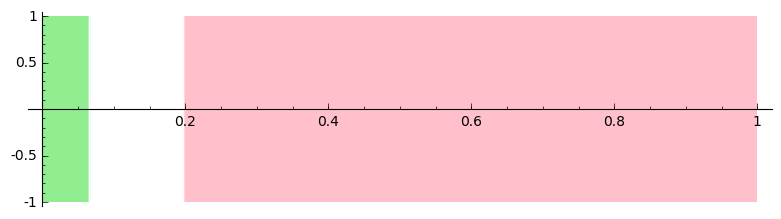

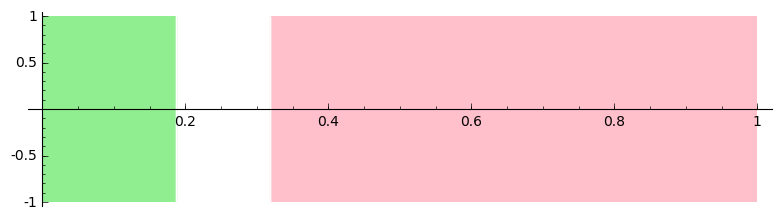

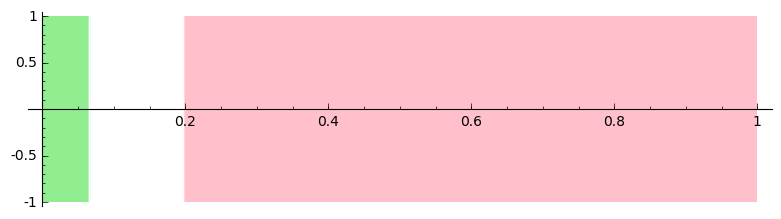

In [193]:
csig1.plot(aspect_ratio=ar).show()
csig2.plot(aspect_ratio=ar).show()
csig.plot(aspect_ratio=ar).show()

In [201]:
step = 0.005
csig = reduce(Signal.__and__,
              (C(RIF(0,1),
                 (lambda x: x + RIF(0.4 + step*k, 0.4 + step*(k+1))),
                 (lambda f: to_signal((lambda t: f(t) - 1.2),
                                      f.derivative(),
                                      RIF(0,10)).F(RIF(0.1,0.2))(0)),
                 y, g, 0.01)
               for k in range(round(0.2/step))))

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943821400406 .. 1.4050000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.15876024774620956]
b = -1.?
t = [0.00000000000000000 .. 0.15786861754804122]
b = -1.?
t = [0.00000000000000000 .. 0.15773806547957062]
b = -1.?
t = [0.00000000000000000 .. 0.15771900829977798]
b = -1.?
found upper bound!
t = [0.15871622705904353 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.15871622705904353 .. 10.000000000000000], fprime(t) = [-1.1988000543788076 .. -0.000034860335290431976]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306561067699 .. 1.4050000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.15876024774620956]
b = -1.?
t = [0.00000000000000000 .. 0.1578686162

b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.066487257309139250]
f(I) = [7.7486038252416733e-8 .. 0.11551036424934869]
t = [0.092903249787434791 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.092903249787434791 .. 10.000000000000000], fprime(t) = [-1.1988004921004177 .. -0.000058223493397235870]
returning res = False
I  = [0.12500000000000000 .. 0.25000000000000000]
C || f(I) = [1.1788007808849214 .. 1.2874969036504627]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.070814351890345573]
b = -2.?
t = [0.00000000000000000 .. 0.070408108513330917]
b = -2.?
t = [0.00000000000000000 .. 0.070380413408985557]
b = -2.?
found upper bound!
t = [0.071378530649977525 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.071378530649977525 .. 10.000000000000000], fprime(t) = [-1.1988004548475147 .. -0.000053514726459980010]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1

returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0115306579694152 .. 1.1888007836788895]
h  = t |--> e^(-t + 0.1?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1888008108362556 .. -0.000045920722186565399]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.77287943867966535 .. 1.0165306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0165306786075235 .. -0.000035087577998638153]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.77787943821400407 .. 1.4150000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.16561259053329905]
b = -1.?
t = [0.00000000000000000 .. 0.16493050910252119]
b = -1.?
t 

t = [0.00000000000000000 .. 0.16833832960353232]
b = -1.?
found upper bound!
t = [0.16933578761760731 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16933578761760731 .. 10.000000000000000], fprime(t) = [-1.1988000543788076 .. -0.000035540200769901275]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0215306561067700 .. 1.4200000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.16914240360301833]
b = -1.?
t = [0.00000000000000000 .. 0.16846063429297814]
b = -1.?
t = [0.00000000000000000 .. 0.16835473976838400]
b = -1.?
t = [0.00000000000000000 .. 0.16833832763476653]
b = -1.?
found upper bound!
t = [0.16933578433711624 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16933578433711624 .. 10.000000000000000], fprime(t) = [-1.1988000618293882

t = [0.098901310691018470 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.098901310691018470 .. 10.000000000000000], fprime(t) = [-1.1988005982711912 .. -0.000059534795582294464]
returning res = False
I  = [0.10937500000000000 .. 0.12500000000000000]
C || f(I) = [1.2974969008564949 .. 1.3163942071422937]
h  = t |--> e^(-t + 0.27?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.074063601756152980 .. 10.000000000000000]
b = -1.?
t = [0.078049142984866523 .. 10.000000000000000]
b = -1.?
t = [0.078114435110744492 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.078115373869876866 .. 0.093322205689284982]
b = -1.2?
t = [0.078115373869876866 .. 0.092585786388384939]
b = -1.2?
t = [0.078115373869876866 .. 0.092574940160628311]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.078115373869876867]
f(I) = [1.6018748327795151e-8 .. 0.11639420799911027]
t = [0.093574783496633895 .. 10.000000000000000]
b = -1.?
stopping since presumed c

I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0265306579694151 .. 1.2038007836788894]
h  = t |--> e^(-t + 0.1?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0032129096689825000]
b = -2.?
t = [0.00000000000000000 .. 0.0031624762402643909]
b = -2.?
found upper bound!
t = [0.0041623162490840581 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.0041623162490840581 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000046602450311183929]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.78787943867966536 .. 1.0315306612290443]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0315306829288602 .. -0.000035767443478107452]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.79287943821400408 .. 1.4300000046566131]
h  = t |--> e^(-t + 0.

C || f(I) = [1.0315306579694152 .. 1.2088007836788895]
h  = t |--> e^(-t + 0.1?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0074580981920691079]
b = -2.?
t = [0.00000000000000000 .. 0.0073083340997454911]
b = -2.?
found upper bound!
t = [0.0083072332784101567 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.0083072332784101567 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000046829693019390106]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.79287943867966537 .. 1.0365306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0365306762978435 .. -0.000035994686186313629]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.79787943821400408 .. 1.4350000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .

t = [0.0073068646875048201 .. 0.093441560880570041]
b = -2.?
t = [0.0073068646875048201 .. 0.093414527212721879]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.0073068646875048202]
f(I) = [4.2393803600937474e-7 .. 0.11749690510332589]
t = [0.094412296433825815 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.094412296433825815 .. 10.000000000000000], fprime(t) = [-1.1988003840669990 .. -0.000054878182709217071]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0365306579694151 .. 1.2138007836788894]
h  = t |--> e^(-t + 0.1?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.011515219505700262]
b = -2.?
t = [0.00000000000000000 .. 0.011435939130654102]
b = -2.?
found upper bound!
t = [0.012435034663409392 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.012435034663409392 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000047056935727596282]
returning res = False
I  = [0.50

C || f(I) = [1.0415306579694152 .. 1.2188007836788895]
h  = t |--> e^(-t + 0.1?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.015735375500587835]
b = -2.?
t = [0.00000000000000000 .. 0.015548797200920801]
b = -2.?
found upper bound!
t = [0.016545900535888093 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.016545900535888093 .. 10.000000000000000], fprime(t) = [-1.1988005628809333 .. -0.000047284178435802459]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.80287943867966538 .. 1.0465306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0465306742116809 .. -0.000036449171602725982]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.80787943821400398 .. 1.4450000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.

t = [0.12285648109333034 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.12285648109333034 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000060671009123325347]
returning res = True
I  = [0.10937500000000000 .. 0.12500000000000000]
C || f(I) = [1.3224969008564948 .. 1.3413942071422936]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.091320578417016906 .. 10.000000000000000]
b = -1.?
t = [0.097100146943021173 .. 10.000000000000000]
b = -1.?
t = [0.097198570847573689 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.097199961309903049 .. 0.11200355562950904]
b = -1.2?
t = [0.097199961309903049 .. 0.11139682992132527]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.097199961309903050]
f(I) = [2.5331974073949936e-8 .. 0.14139420837163930]
t = [0.11238809567538055 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11238809567538055 .. 10.000000000000000], fprime(t) 

b = -1.?
t = [0.019627476241922115 .. 10.000000000000000]
b = -1.?
t = [0.019637918086773946 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.019639547275769438 .. 0.19025129443503522]
b = -2.?
t = [0.019639547275769438 .. 0.18939988143222015]
b = -2.?
t = [0.019639547275769438 .. 0.18926664247916423]
b = -2.?
t = [0.019639547275769438 .. 0.18924584604915346]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.019639547275769439]
f(I) = [3.6247074608475315e-7 .. 0.25000000484287744]
t = [0.19024260181445620 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.19024260181445620 .. 10.000000000000000], fprime(t) = [-1.1987999016419054 .. -0.000055558048188686370]
bisecting [0.00000000000000000 .. 0.25000000000000000] -> [0.00000000000000000 .. 0.12500000000000000], [0.12500000000000000 .. 0.25000000000000000]
I  = [0.00000000000000000 .. 0.12500000000000000]
C || f(I) = [1.3274969008564947 .. 1.4500000018626454]
h  = t |--> e^(-t + 0.3?)
t = [0.00000

t = [0.00000000000000000 .. 0.19388076578126313]
b = -1.?
t = [0.00000000000000000 .. 0.19289461948420575]
b = -1.?
t = [0.00000000000000000 .. 0.19272121951143767]
b = -1.?
t = [0.00000000000000000 .. 0.19269081115744533]
b = -1.?
found upper bound!
t = [0.19368548130399232 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.19368548130399232 .. 10.000000000000000], fprime(t) = [-1.1987992590293289 .. -0.000037129037082195281]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0565306561067699 .. 1.4550000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.19388076578126313]
b = -1.?
t = [0.00000000000000000 .. 0.19289461884349027]
b = -1.?
t = [0.00000000000000000 .. 0.19272121759022074]
b = -1.?
t = [0.00000000000000000 .. 0.19269080987625426]
b = -1.?
found upper bound

0 on lower boundary!
t = [0.00000000000000000 .. 0.19797876917346647]
b = -1.?
t = [0.00000000000000000 .. 0.19644823634321465]
b = -1.?
t = [0.00000000000000000 .. 0.19617429495402436]
b = -1.?
t = [0.00000000000000000 .. 0.19612546507376194]
b = -1.?
found upper bound!
t = [0.19711676945527431 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.19711676945527431 .. 10.000000000000000], fprime(t) = [-1.1987983575090766 .. -0.000037356279790401458]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0615306561067698 .. 1.4600000027939680]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.19797876917346647]
b = -1.?
t = [0.00000000000000000 .. 0.19644823442465656]
b = -1.?
t = [0.00000000000000000 .. 0.19617429303476730]
b = -1.?
t = [0.00000000000000000 .. 0.19612546379233476]
b = -

b = -2.?
found upper bound!
t = [0.032822328236571517 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.032822328236571517 .. 10.000000000000000], fprime(t) = [-1.1988005181774498 .. -0.000048191286623477935]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.82287943867966528 .. 1.0665306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0665306774899364 .. -0.000037356279790401458]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.82787943821400400 .. 1.4650000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.20005855686520111]
b = -1.?
t = [0.00000000000000000 .. 0.19962874558700817]
b = -1.?
t = [0.00000000000000000 .. 0.19955088905444660]
b = -1.?
t = [0.00000000000000000 .. 0.19953680173576203]
b = -1.?
found upp

t = [0.00000000000000000 .. 0.20428073385819160]
b = -1.?
t = [0.00000000000000000 .. 0.20318768249821260]
b = -1.?
t = [0.00000000000000000 .. 0.20298621157735561]
b = -1.?
t = [0.00000000000000000 .. 0.20294918307899085]
b = -1.?
found upper bound!
t = [0.20394238011607923 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.20394238011607923 .. 10.000000000000000], fprime(t) = [-1.1987987766042352 .. -0.000037810765206813812]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0715306561067698 .. 1.4700000027939680]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.20428073385819160]
b = -1.?
t = [0.00000000000000000 .. 0.20318768122972203]
b = -1.?
t = [0.00000000000000000 .. 0.20298620967505702]
b = -1.?
t = [0.00000000000000000 .. 0.20294917990951634]
b = -1.?
found upper bound

t = [0.00000000000000000 .. 0.040125942638587501]
b = -2.?
t = [0.00000000000000000 .. 0.039872502838703993]
b = -2.?
found upper bound!
t = [0.040862565555528647 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.040862565555528647 .. 10.000000000000000], fprime(t) = [-1.1988001344725490 .. -0.000048645772039890289]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.83287943867966529 .. 1.0765306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0765306735411287 .. -0.000037810765206813812]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.83787943821400401 .. 1.4750000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.20642354119677348]
b = -1.?
t = [0.00000000000000000 .. 0.20635268061927162]
b = -1.?
t = [0.000000000

t = [0.00000000000000000 .. 0.20992022447908507]
b = -1.?
t = [0.00000000000000000 .. 0.20975833116655077]
b = -1.?
t = [0.00000000000000000 .. 0.20972768700425113]
b = -1.?
found upper bound!
t = [0.21072188838855820 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.21072188838855820 .. 10.000000000000000], fprime(t) = [-1.1987990001216531 .. -0.000038265250623226165]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0815306561067699 .. 1.4800000027939680]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.21077365437482859]
b = -1.?
t = [0.00000000000000000 .. 0.20992022258965796]
b = -1.?
t = [0.00000000000000000 .. 0.20975832990629379]
b = -1.?
t = [0.00000000000000000 .. 0.20972768511466428]
b = -1.?
found upper bound!
t = [0.21072188775751538 .. 10.000000000000000]
b = -1.?

I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.2588007790222763 .. 1.4850000027939679]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.039596480502088471 .. 10.000000000000000]
b = -1.?
t = [0.046553873953706657 .. 10.000000000000000]
b = -1.?
t = [0.047641652958737949 .. 10.000000000000000]
b = -1.?
t = [0.047808028934409434 .. 10.000000000000000]
b = -1.?
t = [0.047833387767819708 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.047837251635406918 .. 0.21382803498803127]
b = -2.?
t = [0.047837251635406918 .. 0.21320537648166291]
b = -2.?
t = [0.047837251635406918 .. 0.21311030781265653]
b = -2.?
t = [0.047837251635406918 .. 0.21309582200292915]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.047837251635406919]
f(I) = [8.3185732369095433e-7 .. 0.28500000499188905]
t = [0.21409361493467507 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.21409361493467507 .. 10.000000000000000], f

t = [0.091919029472415689 .. 0.10146734154026419]
b = -1.2?
t = [0.091919029472415689 .. 0.10067014495950343]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.091919029472415690]
f(I) = [4.8428774324094092e-9 .. 0.12708442956209188]
t = [0.10166288325975715 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10166288325975715 .. 10.000000000000000], fprime(t) = [-1.1988005442544818 .. -0.000059722922742366790]
returning res = None
I  = [0.17968750000000000 .. 0.18750000000000000]
C || f(I) = [1.3090291167795657 .. 1.3205312747880818]
h  = t |--> e^(-t + 0.27?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.082564581230806108 .. 10.000000000000000]
b = -1.?
t = [0.086916269828126876 .. 10.000000000000000]
b = -1.?
t = [0.086963752270398542 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.086964167099480557 .. 0.096048281534807184]
b = -1.2?
t = [0.086964167099480557 .. 0.095715560465967881]
b = -1.2?
found upper bound!
  I  = [

stopping since presumed converged
t = [0.056750710454104298 .. 10.000000000000000], fprime(t) = [-1.1988005274906755 .. -0.000049552880227565765]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.85287943867966531 .. 1.0965306612290442]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0965306824073196 .. -0.000038717873394489288]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.85787943821400403 .. 1.4950000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22203532954524858]
b = -1.?
t = [0.00000000000000000 .. 0.22024681780659575]
b = -1.?
t = [0.00000000000000000 .. 0.21989198278591632]
b = -1.?
t = [0.00000000000000000 .. 0.21982188951809115]
b = -1.?
t = [0.00000000000000000 .. 0.21980805623198899]
b = -1.?
found upper bound!
t = [0.22080532655

t = [0.00000000000000000 .. 0.060305493554938611]
b = -2.?
t = [0.00000000000000000 .. 0.059719830493689140]
b = -2.?
t = [0.00000000000000000 .. 0.059685716529978631]
b = -2.?
found upper bound!
t = [0.060683740413552254 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.060683740413552254 .. 10.000000000000000], fprime(t) = [-1.1988004734739662 .. -0.000049780122935771942]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.85787943867966531 .. 1.1015306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1015306776389480 .. -0.000038945116102695465]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86287943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000

t = [0.078784866829899311 .. 10.000000000000000]
b = -1.?
t = [0.078902797537587623 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.078905511592570323 .. 0.10288640851454187]
b = -1.2?
t = [0.078905511592570323 .. 0.10214484374115731]
b = -1.2?
t = [0.078905511592570323 .. 0.10212754053176916]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.078905511592570324]
f(I) = [7.7486038252416733e-8 .. 0.12902912050485616]
t = [0.10312714258252178 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10312714258252178 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000058951787650585174]
bisecting [0.18750000000000000 .. 0.21875000000000000] -> [0.18750000000000000 .. 0.20312500000000000], [0.20312500000000000 .. 0.21875000000000000]
I  = [0.18750000000000000 .. 0.20312500000000000]
C || f(I) = [1.3111762114614247 .. 1.3290291186422110]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.083652198474

t = [0.14156957200711756 .. 0.22717769522988294]
b = -2.?
t = [0.14156957200711756 .. 0.22652906865661091]
b = -2.?
t = [0.14156957200711756 .. 0.22647604467645411]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.14156957200711757]
f(I) = [9.7975134893957260e-8 .. 0.30500000268220906]
t = [0.22747172660577680 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22747172660577680 .. 10.000000000000000], fprime(t) = [-1.1988001605495811 .. -0.000062762759625911712]
returning res = True
I  = [0.12500000000000000 .. 0.25000000000000000]
C || f(I) = [1.2788007808849215 .. 1.3874969036504628]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.056793478104919227 .. 10.000000000000000]
b = -1.?
t = [0.063046566726254374 .. 10.000000000000000]
b = -1.?
t = [0.063557598044097524 .. 10.000000000000000]
b = -1.?
t = [0.063597772831546037 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.063600922440785329 .. 0.14523380

t = [0.00000000000000000 .. 0.23145689438645703]
b = -1.?
t = [0.00000000000000000 .. 0.23013180567314063]
b = -1.?
t = [0.00000000000000000 .. 0.22985870809657905]
b = -1.?
t = [0.00000000000000000 .. 0.22980259634346601]
b = -1.?
t = [0.00000000000000000 .. 0.22979107582159620]
b = -1.?
found upper bound!
t = [0.23078871124910135 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.23078871124910135 .. 10.000000000000000], fprime(t) = [-1.1987998830154539 .. -0.000039626844227313995]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1115306561067699 .. 1.5100000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.23145689438645703]
b = -1.?
t = [0.00000000000000000 .. 0.23013180443796625]
b = -1.?
t = [0.00000000000000000 .. 0.22985870686106777]
b = -1.?
t = [0.0000000000

t = [0.00000000000000000 .. 0.23387146333032158]
b = -1.?
t = [0.00000000000000000 .. 0.23325580021983939]
b = -1.?
t = [0.00000000000000000 .. 0.23312756245002736]
b = -1.?
t = [0.00000000000000000 .. 0.23310089047813757]
b = -1.?
found upper bound!
t = [0.23409534262339365 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.23409534262339365 .. 10.000000000000000], fprime(t) = [-1.1987988753244281 .. -0.000039854086935520172]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1165306561067700 .. 1.5150000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.23387146333032158]
b = -1.?
t = [0.00000000000000000 .. 0.23325579898961372]
b = -1.?
t = [0.00000000000000000 .. 0.23312756121988052]
b = -1.?
t = [0.00000000000000000 .. 0.23310088740378760]
b = -1.?
found upper bound

I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.87787943867966533 .. 1.1215306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1215306827798486 .. -0.000039854086935520172]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.88287943821400405 .. 1.5200000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.23877327974326099]
b = -1.?
t = [0.00000000000000000 .. 0.23689302537718116]
b = -1.?
t = [0.00000000000000000 .. 0.23649504073005704]
b = -1.?
t = [0.00000000000000000 .. 0.23641115748648750]
b = -1.?
t = [0.00000000000000000 .. 0.23639349434123994]
b = -1.?
found upper bound!
t = [0.23738977468791336 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.23738977468791336 .. 10.000000000000000], fprime(t) = [-1.1987994285300375 .. -0.0000400

t = [0.094189810865388801 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.094190282726294968 .. 0.10282314631145390]
b = -1.2?
t = [0.094190282726294968 .. 0.10272639261724989]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.094190282726294969]
f(I) = [4.8428774324094092e-9 .. 0.12982468232512479]
t = [0.10372556555210543 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10372556555210543 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000059858895838260650]
returning res = None
I  = [0.21875000000000000 .. 0.25000000000000000]
C || f(I) = [1.2938007808849214 .. 1.3235225747153164]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.070872063280165820 .. 10.000000000000000]
b = -1.?
t = [0.075154661828925134 .. 10.000000000000000]
b = -1.?
t = [0.075260237448701611 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.075262614518831316 .. 0.098260895878979960]
b = -1.2?
t = [0.07526

t = [0.097975221723992103 .. 0.11123138278414776]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.097975221723992104]
f(I) = [1.9744038626257065e-8 .. 0.14117621369659906]
t = [0.11222552160833633 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11222552160833633 .. 10.000000000000000], fprime(t) = [-1.1988005274906755 .. -0.000060086138546466827]
bisecting [0.20312500000000000 .. 0.21875000000000000] -> [0.20312500000000000 .. 0.21093750000000000], [0.21093750000000000 .. 0.21875000000000000]
I  = [0.20312500000000000 .. 0.21093750000000000]
C || f(I) = [1.3298246771842241 .. 1.3411762133240702]
h  = t |--> e^(-t + 0.29?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.096799116951115468 .. 10.000000000000000]
b = -1.?
t = [0.10265801408784168 .. 10.000000000000000]
b = -1.?
t = [0.10272497835485142 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.10272554719354506 .. 0.11206561467412474]
b = -1.2?
t = [0.10272554719354506

t = [0.00000000000000000 .. 0.24312491765942310]
b = -1.?
t = [0.00000000000000000 .. 0.24298474582102251]
b = -1.?
t = [0.00000000000000000 .. 0.24295450048136616]
b = -1.?
found upper bound!
t = [0.24394797647544982 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.24394797647544982 .. 10.000000000000000], fprime(t) = [-1.1987984729930759 .. -0.000051368959248065948]
bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [0.25000000000000000 .. 0.50000000000000000]
I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.3038007790222763 .. 1.5300000027939678]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.067843642617044050 .. 10.000000000000000]
b = -1.?
t = [0.080630060285183602 .. 10.000000000000000]
b = -1.?
t = [0.082615021871433561 .. 10.000000000000000]
b = -1.?
t = [0.082910748167849795 .. 10.000000000000000]
b = -1.?
t = [0.082954519562193296 .. 10.00000

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.89787943821400406 .. 1.5350000046566131]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.24631135889276146]
b = -1.?
t = [0.00000000000000000 .. 0.24623121006112914]
b = -1.?
t = [0.00000000000000000 .. 0.24621371466611431]
b = -1.?
found upper bound!
t = [0.24720989606156221 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.24720989606156221 .. 10.000000000000000], fprime(t) = [-1.1987993391230703 .. -0.000040761195123195648]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1365306561067700 .. 1.5350000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.24631135889276146]
b = -1.?
t = [0.00000000000000000 .. 0.24623120824085748]
b = -1.?
t = [0.00000000000000000 .. 0.2462137128

C || f(I) = [1.3088007808849215 .. 1.3260651117563250]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.082047837792893721 .. 10.000000000000000]
b = -1.?
t = [0.086716909572801578 .. 10.000000000000000]
b = -1.?
t = [0.086788774244807034 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.086789711212530235 .. 0.10015571994605906]
b = -1.2?
t = [0.086789711212530235 .. 0.099897873719758501]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.086789711212530236]
f(I) = [1.6018748327795151e-8 .. 0.12606511376798158]
t = [0.10089448280030227 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10089448280030227 .. 10.000000000000000], fprime(t) = [-1.1988005721941591 .. -0.000059417448937892913]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1365306579694152 .. 1.3138007836788895]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0915968145483385

t = [0.090601708110720158 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.090602723260372511 .. 0.10449528333591951]
b = -1.2?
t = [0.090602723260372511 .. 0.10366910846839155]
b = -1.2?
t = [0.090602723260372511 .. 0.10365804783003746]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.090602723260372512]
f(I) = [1.6018748327795151e-8 .. 0.13106511272490030]
t = [0.10465790320247002 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10465790320247002 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000059644691646099090]
bisecting [0.23437500000000000 .. 0.25000000000000000] -> [0.23437500000000000 .. 0.24218750000000000], [0.24218750000000000 .. 0.25000000000000000]
I  = [0.23437500000000000 .. 0.24218750000000000]
C || f(I) = [1.3199089913070201 .. 1.3310651117563249]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.090084988821929751 .. 10.000000000000000]
b = -1.?
t = [0.095184853637

returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.90787943867966536 .. 1.1515306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1515306839719415 .. -0.000041215680539608001]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.91287943821400407 .. 1.5500000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.25671862787235661]
b = -1.?
t = [0.00000000000000000 .. 0.25611093220434622]
b = -1.?
t = [0.00000000000000000 .. 0.25597348413439714]
b = -1.?
t = [0.00000000000000000 .. 0.25594243696434205]
b = -1.?
found upper bound!
t = [0.25693542452598960 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.25693542452598960 .. 10.000000000000000], fprime(t) = [-1.1987981693819166 .. -0.000041442923247814178]
bisecting [0.0000000

t = [0.10295555979766553 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10295555979766553 .. 10.000000000000000], fprime(t) = [-1.1988003207370639 .. -0.000052277930080890655]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.2322892770916222 .. 1.3288007836788894]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.024299558680297601 .. 10.000000000000000]
b = -1.?
t = [0.026386127462923552 .. 10.000000000000000]
b = -1.?
t = [0.026540014899917287 .. 10.000000000000000]
b = -1.?
t = [0.026551204604337880 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.026552017326604757 .. 0.10251918772930563]
b = -1.2?
t = [0.026552017326604757 .. 0.10199641600626980]
b = -1.2?
t = [0.026552017326604757 .. 0.10195829978985200]
b = -1.2?
found upper bound!
  I  = [0.0

b = -1.?
t = [0.10194617289700053 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.10195397690168572 .. 0.26141996623594616]
b = -2.?
t = [0.10195397690168572 .. 0.25948580793803561]
b = -2.?
t = [0.10195397690168572 .. 0.25920230717060006]
b = -2.?
t = [0.10195397690168572 .. 0.25916102080302834]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.10195397690168573]
f(I) = [1.5936791897264157e-6 .. 0.35500000528991227]
t = [0.26015501428807930 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.26015501428807930 .. 10.000000000000000], fprime(t) = [-1.1987993931397796 .. -0.000060326419770717620]
returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1565306579694152 .. 1.3338007836788895]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.10678291847039984]
b = -2.?
t = [0.00000000000000000 .. 0.10581908549895686]
b = -2.?
t = [0.00000000000000000 .. 0.10572188614642303]
b = -2.?
found upp

found upper bound!
  I  = [0.00000000000000000 .. 0.10570966799380776]
f(I) = [1.6402453184571896e-6 .. 0.36000000610947614]
t = [0.26336544261472361 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.26336544261472361 .. 10.000000000000000], fprime(t) = [-1.1987992143258453 .. -0.000060551799833774566]
returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1615306579694151 .. 1.3388007836788894]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.11032155768297137]
b = -2.?
t = [0.00000000000000000 .. 0.10954313524735085]
b = -2.?
t = [0.00000000000000000 .. 0.10946209687465592]
b = -2.?
found upper bound!
t = [0.11045369160292194 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11045369160292194 .. 10.000000000000000], fprime(t) = [-1.1987994546070695 .. -0.000052732415497303009]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [

t = [0.11418141645722146 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11418141645722146 .. 10.000000000000000], fprime(t) = [-1.1987994546070695 .. -0.000052957795560359954]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.2472892770916224 .. 1.3438007836788895]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.035190687139146407 .. 10.000000000000000]
b = -1.?
t = [0.038396984152553610 .. 10.000000000000000]
b = -1.?
t = [0.038632781908418761 .. 10.000000000000000]
b = -1.?
t = [0.038649745561925449 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.038650963837610102 .. 0.11396542800261423]
b = -1.2?
t = [0.038650963837610102 .. 0.11323711205202839]
b = -1.2?
t = [0.038650963837610102 .. 0.11318452068584298]
b = -1.2?
found upper bound!
  I  = [0.0

C || f(I) = [1.3438007790222763 .. 1.5700000027939678]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.091592849066938944 .. 10.000000000000000]
b = -1.?
t = [0.10987217543904388 .. 10.000000000000000]
b = -1.?
t = [0.11269912119097452 .. 10.000000000000000]
b = -1.?
t = [0.11311099530775484 .. 10.000000000000000]
b = -1.?
t = [0.11317043348157407 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.11317899947720874 .. 0.27132653433882226]
b = -2.?
t = [0.11317899947720874 .. 0.26912752943450197]
b = -2.?
t = [0.11317899947720874 .. 0.26880793279214388]
b = -2.?
t = [0.11317899947720874 .. 0.26876182832592605]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.11317899947720875]
f(I) = [1.7296522856202756e-6 .. 0.37000000402331357]
t = [0.26975518363053496 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.26975518363053496 .. 10.000000000000000], fprime(t) = [-1.1987992757931352 .. -0.000061006285250186920]

returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1765306579694152 .. 1.3538007836788895]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.12159391562430745]
b = -2.?
t = [0.00000000000000000 .. 0.12070846157815133]
b = -2.?
t = [0.00000000000000000 .. 0.12060743136757525]
b = -2.?
t = [0.00000000000000000 .. 0.12059594786006952]
b = -2.?
found upper bound!
t = [0.12159464299108189 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.12159464299108189 .. 10.000000000000000], fprime(t) = [-1.1988004194572568 .. -0.000053412280976772308]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.2572892770916224 .. 1.3538007836788895]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.042317358095539811 .. 10.000000

found upper bound!
t = [0.27610616001834920 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.27610616001834920 .. 10.000000000000000], fprime(t) = [-1.1987971859052778 .. -0.000053639523684978485]
bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [0.25000000000000000 .. 0.50000000000000000]
I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.3538007790222763 .. 1.5800000027939678]
h  = t |--> e^(-t + 0.4?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.097342261180778280 .. 10.000000000000000]
b = -1.?
t = [0.11703574182840263 .. 10.000000000000000]
b = -1.?
t = [0.12007956742170361 .. 10.000000000000000]
b = -1.?
t = [0.12052063918012537 .. 10.000000000000000]
b = -1.?
t = [0.12058389601490943 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.12059295524074009 .. 0.27662117934704389]
b = -2.?
t = [0.12059295524074009 .. 0.27532158784794459]
b = -2.?
t = [0.12059295524074

b = -1.?
t = [0.12059606267818541 .. 10.000000000000000]
b = -1.?
t = [0.12374927564033680 .. 10.000000000000000]
b = -1.?
t = [0.12420497081407151 .. 10.000000000000000]
b = -1.?
t = [0.12427012234057233 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.12427942319828752 .. 0.27890512652099598]
b = -2.?
t = [0.12427942319828752 .. 0.27835469147862291]
b = -2.?
t = [0.12427942319828752 .. 0.27827596372677882]
b = -2.?
t = [0.12427942319828752 .. 0.27826472424285509]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.12427942319828753]
f(I) = [1.8563121557679806e-6 .. 0.38500000461936002]
t = [0.27926312023713417 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.27926312023713417 .. 10.000000000000000], fprime(t) = [-1.1988003039732576 .. -0.000061688013374805450]
returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1865306579694152 .. 1.3638007836788893]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.000000

t = [0.00000000000000000 .. 0.28141680280934329]
b = -1.?
found upper bound!
t = [0.28241352806832054 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28241352806832054 .. 10.000000000000000], fprime(t) = [-1.1987993391230703 .. -0.000043259002268314361]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1915306561067700 .. 1.5900000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.28170623525457650]
b = -1.?
t = [0.00000000000000000 .. 0.28148455307006288]
b = -1.?
t = [0.00000000000000000 .. 0.28143014754842172]
b = -1.?
t = [0.00000000000000000 .. 0.28141680046592449]
b = -1.?
found upper bound!
t = [0.28241352689637477 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28241352689637477 .. 10.000000000000000], fprime(t) = [-1.1987993391230703

t = [0.28555326483583926 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28555326483583926 .. 10.000000000000000], fprime(t) = [-1.1987993204966188 .. -0.000043486244976520538]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1965306561067701 .. 1.5950000027939677]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.28462329760712224]
b = -1.?
t = [0.00000000000000000 .. 0.28456979659963333]
b = -1.?
t = [0.00000000000000000 .. 0.28455654507645401]
b = -1.?
found upper bound!
t = [0.28555326308403594 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28555326308403594 .. 10.000000000000000], fprime(t) = [-1.1987993204966188 .. -0.000054321251809597015]
bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [

t = [0.00000000000000000 .. 0.29054522588902532]
b = -1.?
t = [0.00000000000000000 .. 0.28840093553136987]
b = -1.?
t = [0.00000000000000000 .. 0.28786198626147247]
b = -1.?
t = [0.00000000000000000 .. 0.28772706625917677]
b = -1.?
t = [0.00000000000000000 .. 0.28769332572303597]
b = -1.?
found upper bound!
t = [0.28868489038527400 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28868489038527400 .. 10.000000000000000], fprime(t) = [-1.1987972492352129 .. -0.000043713487684726715]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.2015306561067700 .. 1.6000000027939679]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.00095665755394908253 .. 10.000000000000000]
b = -1.?
t = [0.0011954786450257806 .. 10.000000000000000]
b = -1.?
t = [0.0012549909443344718 .. 10.000

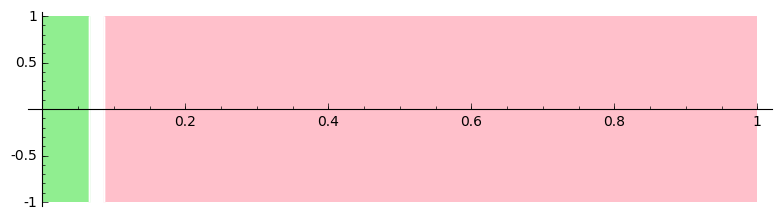

In [202]:
csig.plot(aspect_ratio=ar)

### Nested contexts

In [189]:
def atom(t):
    b = 0.93
    print '===>', RIF(t).str(style='brackets'), RIF(h(t) - b).str(style='brackets')
    return h(t) - b

In [190]:
load('interval_signals.py')

In [191]:
csig = C(RIF(0,5),
         (lambda x: x + 0.5),
         (lambda f: C(RIF(0,10),
                      (lambda x: x + 0.2),
                      (lambda h: to_signal(atom,
                                           h.derivative(),
                                           RIF(0,1)).F(RIF(0.1,0.2))(0)),
                      f,
                      g,
                      0.1).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.1)
csig

I  = [0.00000000000000000 .. 5.0000000000000000]
C || f(I) = [0.50673794467002153 .. 1.5000000083819032]
h  = t |--> e^(-t + 0.?)
I  = [0.00000000000000000 .. 10.000000000000000]
C || f(I) = [0.20002300459891558 .. 1.7000000288710000]
h  = t |--> e^(-t + 0.?e1)
===> [0.00000000000000000 .. -0.00000000000000000] [0.019235418082440780 .. 0.26866933079506128]
t = [0.00000000000000000 .. 1.0000000000000000]
===> [0.00000000000000000 .. -0.00000000000000000] [0.019235418082440780 .. 0.26866933079506128]
b = -1.?
t = [0.011314951564010831 .. 1.0000000000000000]
===> [0.011314951564010831 .. 0.011314951564010832] [0.024699997994693356 .. 0.27958191100356900]
b = -1.?
t = [0.026009694994190740 .. 1.0000000000000000]
===> [0.026009694994190740 .. 0.026009694994190741] [0.031333261871068773 .. 0.29322469251291151]
b = -1.?
t = [0.044926707187921820 .. 1.0000000000000000]
===> [0.044926707187921820 .. 0.044926707187921821] [0.039103223624247451 .. 0.30990276877567447]
b = -1.?
t = [0.068985567543

Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 5.0000000000000000], True)])